# COVID-19 analysis

- <https://github.com/Kamaropoulos/covid19py>

Note that the JHU data source is not providing recovery data at this time ([reference](https://github.com/ExpDev07/coronavirus-tracker-api/blob/master/README.md#recovered-cases-showing-0)).

Another source of data might be the following: <https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data>

## data sources (acquired reliably from CERN)

```Bash
mkdir COVID19
cd COVID19
virtualenv -p python3.6 COVID19
source COVID19/bin/activate
pip3.6 install pip --upgrade
pip3.6 install jupyter matplotlib numpy pandas requests seaborn
pip3.6 install COVID19Py
python3.6
```

```Python
import COVID19Py
import numpy as np
import pandas as pd

import json
import pickle
from uuid import uuid4

def uuid4_short():
    return str(uuid4()).split('-')[0]

def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose:
        print(filename)
    return filename

covid19 = COVID19Py.COVID19()
data = covid19.getAll(timelines=True)

with open(new_filename(), 'wb') as f:
    pickle.dump(data, f)
```

In [1]:
import json
import pickle
from uuid import uuid4
import warnings

import COVID19Py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelcolor'] = (1, 1, 1, 0)
pd.set_option("display.max_rows"   , 1000)
pd.set_option("display.max_columns", 1000)
sns.set_palette('husl')
sns.set(style='ticks')
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [13, 6]
sns.set()

In [3]:
def uuid4_short():
    return str(uuid4()).split('-')[0]
def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose: print(filename)
    return filename

In [4]:
%%time
if 0:
    covid19 = COVID19Py.COVID19(data_source='jhu') # https://github.com/CSSEGISandData/COVID-19
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)
    data = covid19.getAll(timelines=True)
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 4.05 µs


In [5]:
if 1:
    #with open('12338731.pkl', 'rb') as f:
    #    covid19 = pickle.load(f)
    with open('411d8cc3.pkl', 'rb') as f:
        data = pickle.load(f)
    # records:
    # 2020-05-18T1412Z data: 411d8cc3.pkl
    # 2020-05-11T1410Z data: 6d5e6f10.pkl
    # 2020-05-03T1505Z data: b3e37289.pkl
    # 2020-04-30T1228Z data: e755d4a0.pkl
    # 2020-04-27T1146Z data: 9986b353.pkl
    # 2020-04-25T0122Z data: edd11ae3.pkl
    # 2020-04-23T1127Z data: d3284a31.pkl
    # 2020-04-19T1002Z data: c3733293.pkl
    # 2020-04-18T0918Z data: 289efaac.pkl
    # 2020-04-17T0818Z data: 13921a54.pkl
    # 2020-04-16T0745Z data: a0c99473.pkl
    # 2020-04-14T0844Z data: ad724da4.pkl
    # 2020-04-13T2005Z data: 65882db6.pkl
    # 2020-04-12T0527z data: d5fb657f.pkl
    # 2020-04-11T2322Z data: 2ed0a4f8.pkl
    # 2020-04-10T1904Z data: 7a48429f.pkl
    # 2020-04-09T0544Z data: 5f3d2ff9.pkl
    # 2020-04-08T0616Z data: 741cd4d4.pkl
    # 2020-04-07       data: 120141ce.pkl

#latest = covid19.getLatest()
#locations = covid19.getLocations(timelines=True)

df = pd.DataFrame(data['locations'])
df.head()
#df

id      country country_code  country_population province  \
0   0  Afghanistan           AF          37172386.0            
1   1      Albania           AL           2866376.0            
2   2      Algeria           DZ          42228429.0            
3   3      Andorra           AD             77006.0            
4   4       Angola           AO          30809762.0            

                  last_updated  \
0  2020-05-18T14:05:59.489525Z   
1  2020-05-18T14:05:59.503094Z   
2  2020-05-18T14:05:59.515510Z   
3  2020-05-18T14:05:59.528068Z   
4  2020-05-18T14:05:59.539857Z   

                                        coordinates  \
0         {'latitude': '33.0', 'longitude': '65.0'}   
1   {'latitude': '41.1533', 'longitude': '20.1683'}   
2    {'latitude': '28.0339', 'longitude': '1.6596'}   
3    {'latitude': '42.5063', 'longitude': '1.5218'}   
4  {'latitude': '-11.2027', 'longitude': '17.8739'}   

                                              latest  \
0  {'confirmed': 6664, 'deaths': 169, 'recovered'...   
1   {'confirmed': 946, 'deaths': 31, 'recovered': 0}   
2  {'confirmed': 7019, 'deaths': 548, 'recovered'...   
3   {'confirmed': 761, 'deaths': 51, 'recovered': 0}   
4     {'confirmed': 48, 'deaths': 2, 'recovered': 0}   

                                           timelines  
0  {'confirmed': {'latest': 6664, 'timeline': {'2...  
1  {'confirmed': {'latest': 946, 'timeline': {'20...  
2  {'confirmed': {'latest': 7019, 'timeline': {'2...  
3  {'confirmed': {'latest': 761, 'timeline': {'20...  
4  {'confirmed': {'latest': 48, 'timeline': {'202...

In [6]:
print(list(dict.fromkeys(list(df['country'].values))))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan'

In [7]:
locations = {}

def process(location):
    location = location['timelines'].values[0]

    confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
    deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
    recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

    confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
    deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
    recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

    # merge
    location = confirmed
    location['deaths']       = deaths['deaths']
    location['recovered']    = recovered['recovered']

    # visual estimate of changes (with linear interpolation)
    half_mean_of_confirmed_cases = location['confirmed'].mean()/2
    half_mean_of_deaths_cases    = location['deaths'].mean()/2
    location['confirmed_percentage_change']                                     = location['confirmed'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['confirmed_percentage_change']                                     = 100*location['confirmed_percentage_change']
    location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = half_mean_of_confirmed_cases*location['confirmed_percentage_change']
    location['deaths_percentage_change']                                        = location['deaths'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['deaths_percentage_change']                                        = 100*location['deaths_percentage_change']
    location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = half_mean_of_confirmed_cases*location['deaths_percentage_change']    

    _location = location
    _location = _location.diff(axis=1)
    location['confirmed_new_cases']  = location['confirmed'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')
    location['deaths_new_cases']     = location['deaths'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')

    # reindex to first confirmed case
    location = location.query('confirmed > 0').reset_index(); del location['datetime']

    display(location.tail())

    #plots
    df_plot = location.drop([
        'confirmed_percentage_change',
        'confirmed_percentage_change_by_half_mean_confirmed_cases_factor',
        'deaths_percentage_change',
        'deaths_percentage_change_by_half_mean_deaths_cases_factor'], axis=1)
    df_plot.plot(title=location_name+' confirmed cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))                   ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
    df_plot.plot(title=location_name+' confirmed cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))           ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

    df_plot = location[['confirmed_percentage_change', 'deaths_percentage_change']]
    df_plot.plot(title=location_name+' percentage change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
    df_plot.plot(title=location_name+' percentage change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

    df_plot = location[['confirmed_new_cases', 'deaths_new_cases']]
    df_plot.plot(title=location_name+' change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');
    df_plot.plot(title=location_name+' change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');

    return location

# South Korea

confirmed  deaths recovered  confirmed_percentage_change  \
112      10991     260       NaN                     0.264550   
113      11018     260       NaN                     0.245656   
114      11037     262       NaN                     0.172445   
115      11050     262       NaN                     0.117786   
116      11065     263       NaN                     0.135747   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
112                                         856.748293                 
113                                         795.557554                 
114                                         558.464897                 
115                                         381.449770                 
116                                         439.616545                 

     deaths_percentage_change  \
112                  0.386100   
113                  0.386100   
114                  0.769231   
115                  0.769231   
116                  0.381679   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
112                                        1250.389400           
113                                        1250.389400           
114                                        2491.160421           
115                                        2491.160421           
116                                        1236.071965           

     confirmed_new_cases  deaths_new_cases  
112                 29.0               1.0  
113                 27.0               1.0  
114                 19.0               2.0  
115                 13.0               2.0  
116                 15.0               1.0

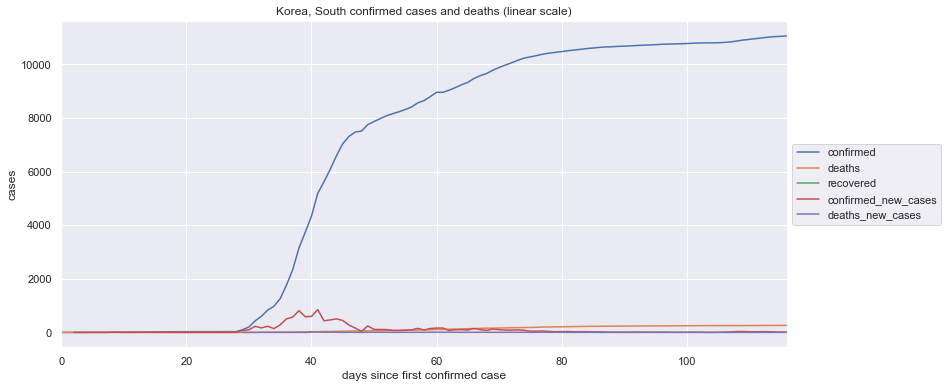

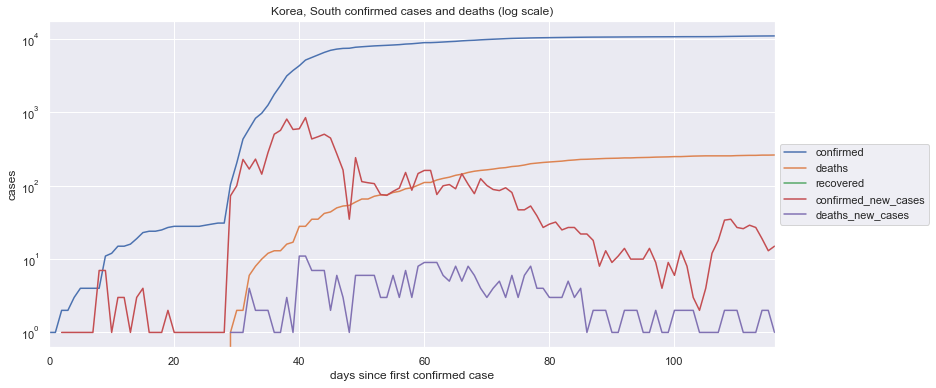

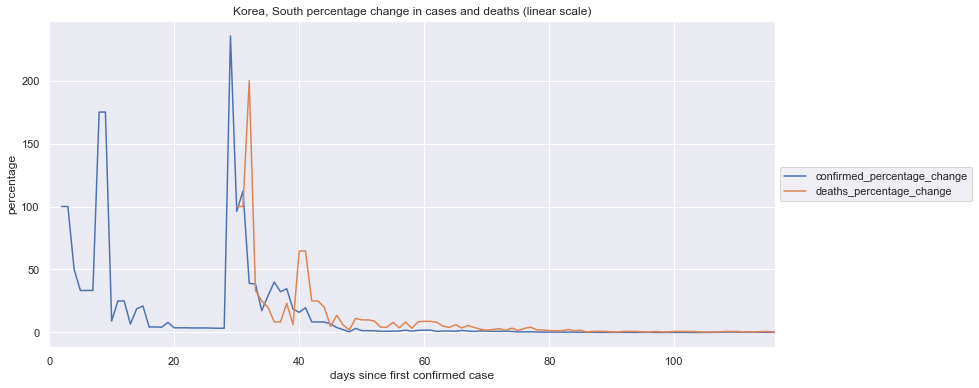

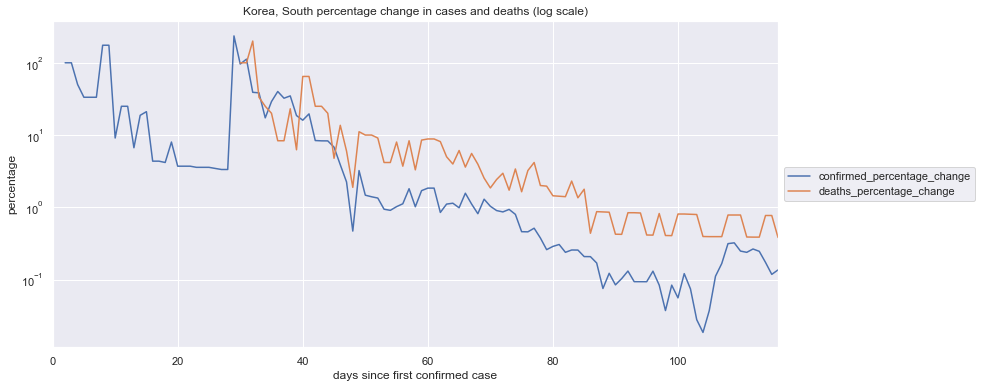

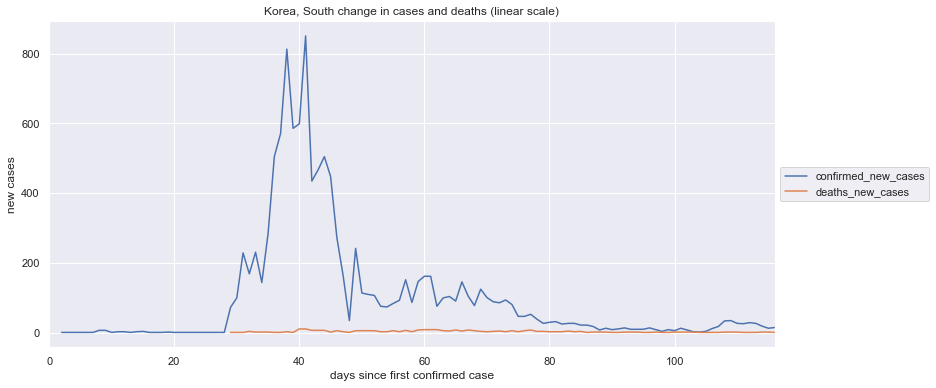

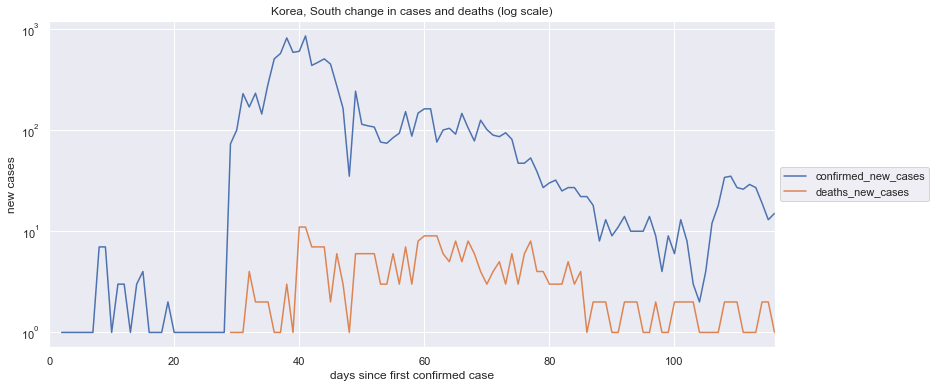

In [8]:
location_name = 'Korea, South'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Belgium

confirmed  deaths recovered  confirmed_percentage_change  \
99       53981    8843       NaN                     0.375611   
100      54288    8903       NaN                     0.568719   
101      54644    8959       NaN                     0.655762   
102      54989    9005       NaN                     0.631359   
103      55280    9052       NaN                     0.529197   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
99                                         3165.693755                 
100                                        4793.223747                 
101                                        5526.833841                 
102                                        5321.166703                 
103                                        4460.128995                 

     deaths_percentage_change  \
99                   0.935966   
100                  0.678503   
101                  0.629001   
102                  0.513450   
103                  0.521932   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
99                                         7888.427247           
100                                        5718.496739           
101                                        5301.294195           
102                                        4327.415014           
103                                        4398.903079           

     confirmed_new_cases  deaths_new_cases  
99                 202.0              82.0  
100                307.0              60.0  
101                356.0              56.0  
102                345.0              46.0  
103                291.0              47.0

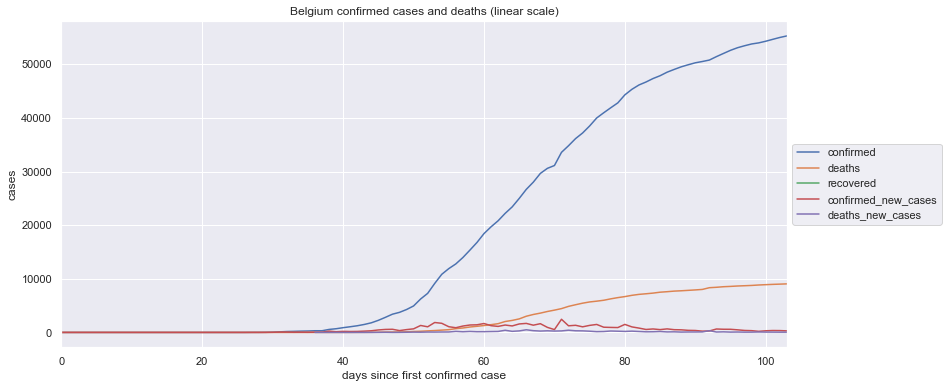

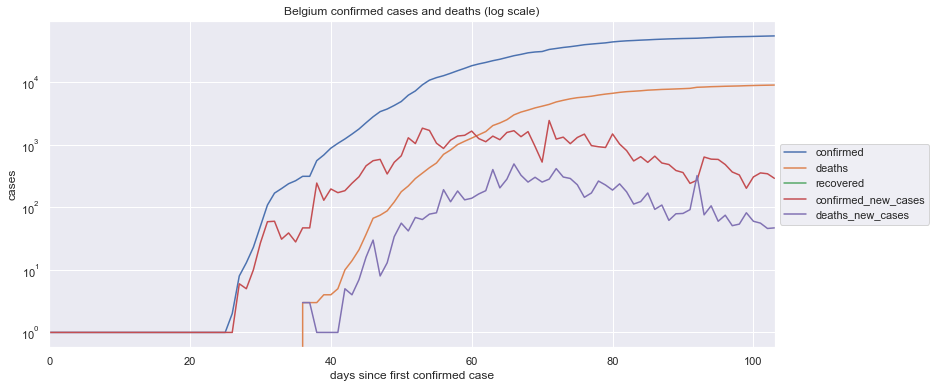

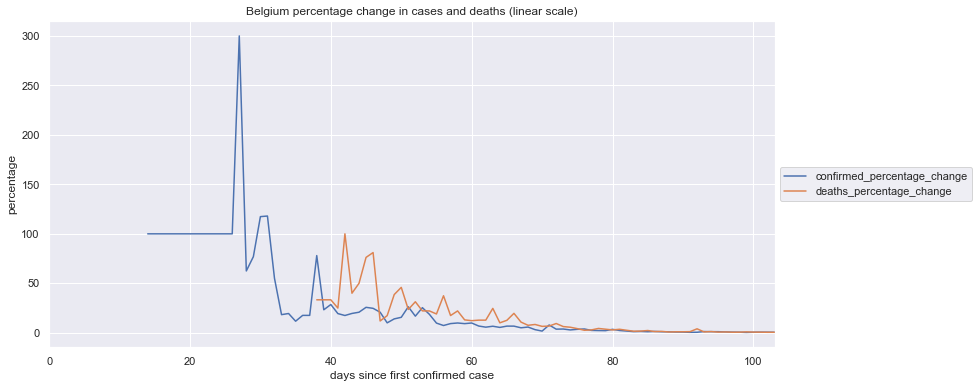

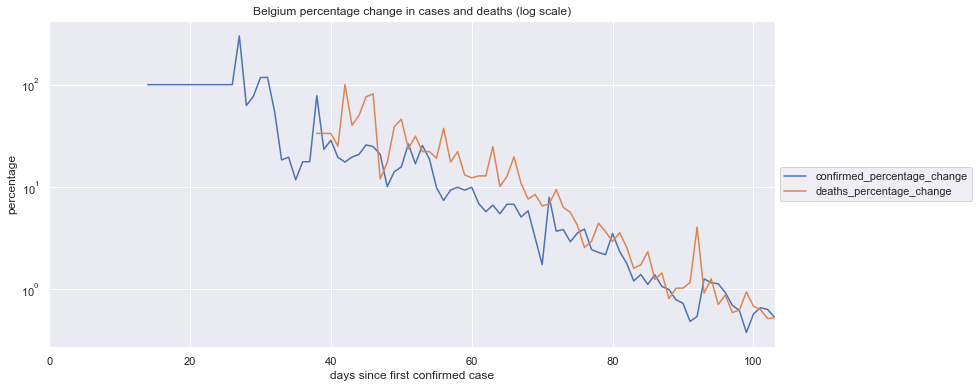

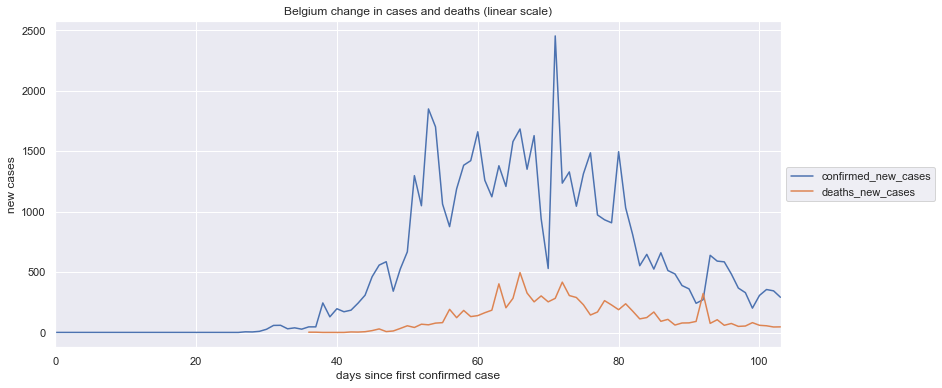

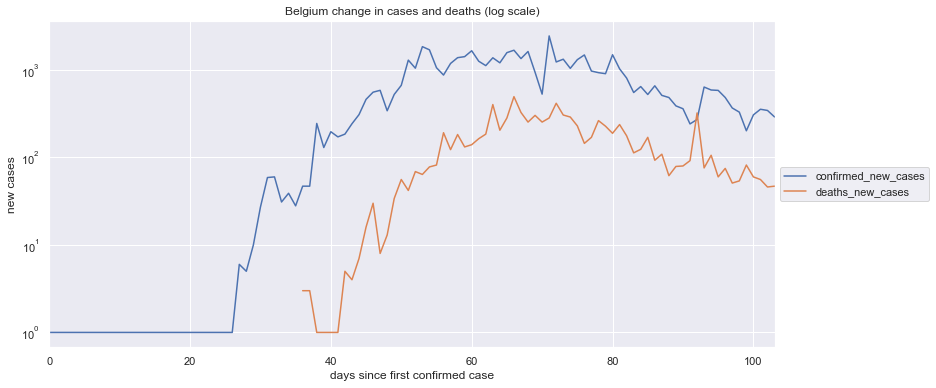

In [9]:
location_name = 'Belgium'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Switzerland

confirmed  deaths recovered  confirmed_percentage_change  \
78      30413    1870       NaN                     0.108624   
79      30463    1872       NaN                     0.164403   
80      30514    1878       NaN                     0.167416   
81      30572    1879       NaN                     0.190077   
82      30587    1881       NaN                     0.049065   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
78                                         666.893452                 
79                                        1009.348229                 
80                                        1027.845381                 
81                                        1166.968504                 
82                                         301.229632                 

    deaths_percentage_change  \
78                  0.160686   
79                  0.106952   
80                  0.320513   
81                  0.053248   
82                  0.106440   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
78                                         986.523011           
79                                         656.626903           
80                                        1967.776134           
81                                         326.914885           
82                                         653.481803           

    confirmed_new_cases  deaths_new_cases  
78                 33.0               3.0  
79                 50.0               2.0  
80                 51.0               6.0  
81                 58.0               1.0  
82                 15.0               2.0

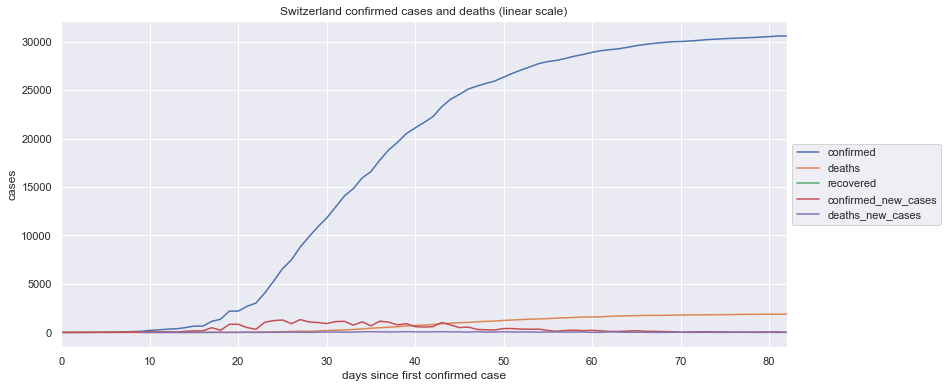

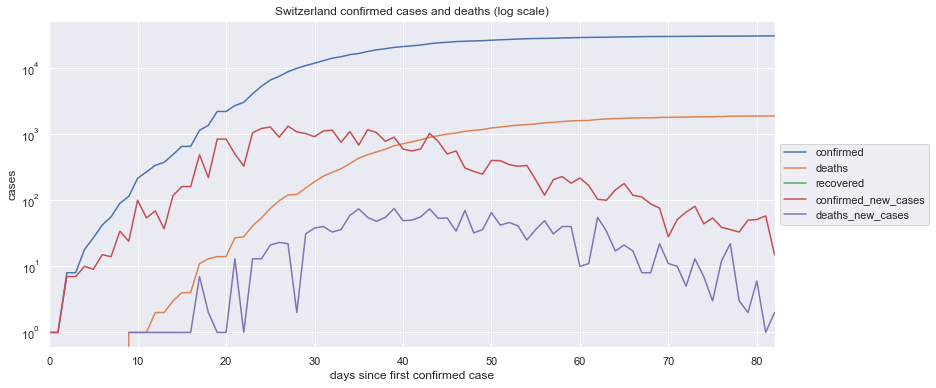

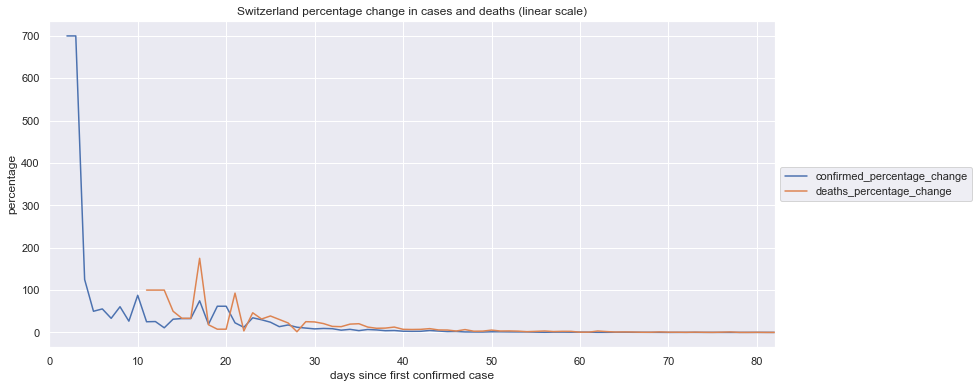

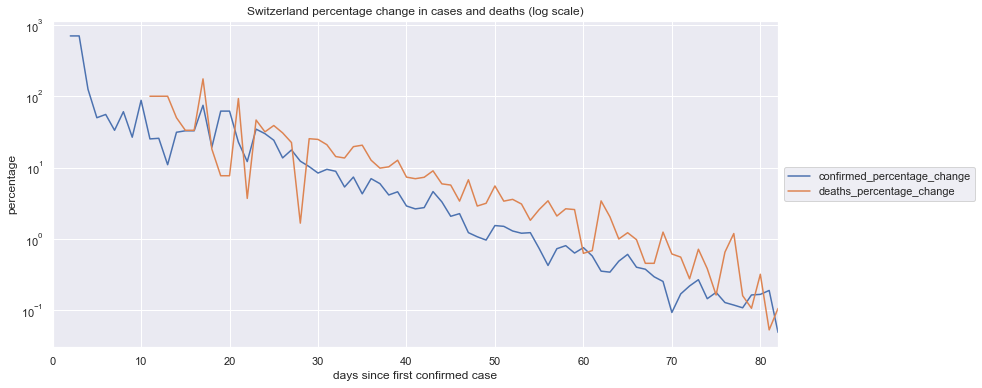

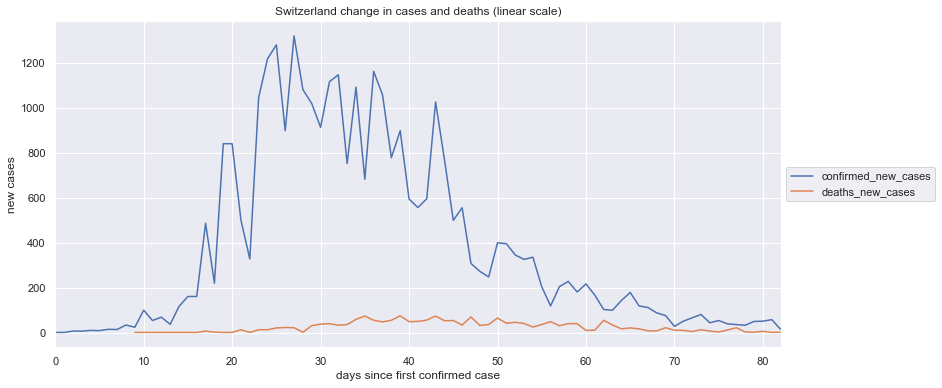

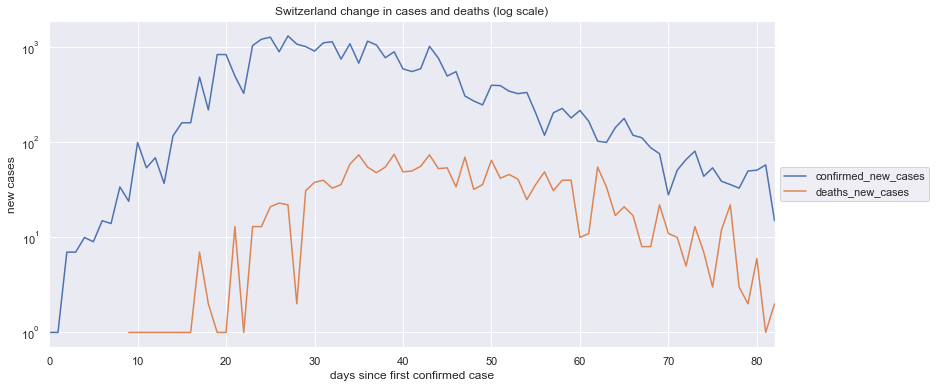

In [10]:
location_name = 'Switzerland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Greece

confirmed  deaths recovered  confirmed_percentage_change  \
77       2760     155       NaN                     0.583090   
78       2770     156       NaN                     0.362319   
79       2810     160       NaN                     1.444043   
80       2819     162       NaN                     0.320285   
81       2834     163       NaN                     0.532104   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
77                                         308.437368                 
78                                         191.655828                 
79                                         763.855719                 
80                                         169.421024                 
81                                         281.466878                 

    deaths_percentage_change  \
77                  1.973684   
78                  0.645161   
79                  2.564103   
80                  1.250000   
81                  0.617284   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
77                                        1044.019906           
78                                         341.271023           
79                                        1356.333552           
80                                         661.212607           
81                                         326.524744           

    confirmed_new_cases  deaths_new_cases  
77                 16.0               3.0  
78                 10.0               1.0  
79                 40.0               4.0  
80                  9.0               2.0  
81                 15.0               1.0

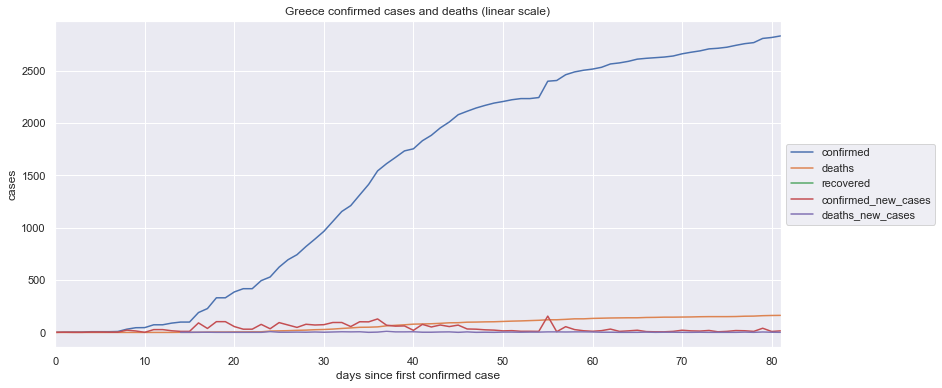

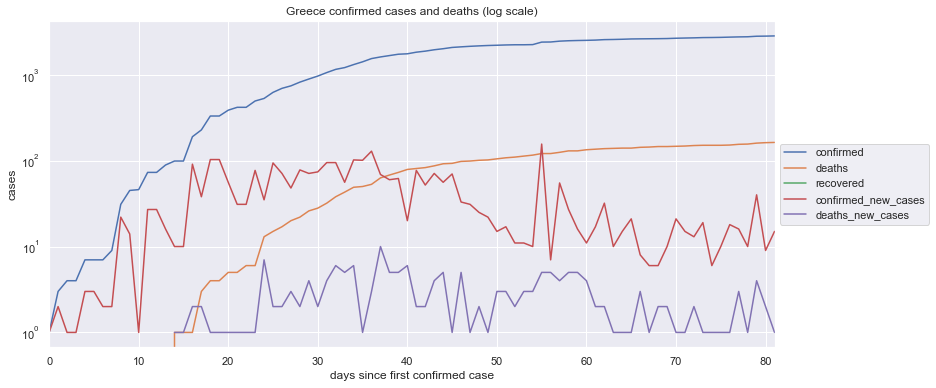

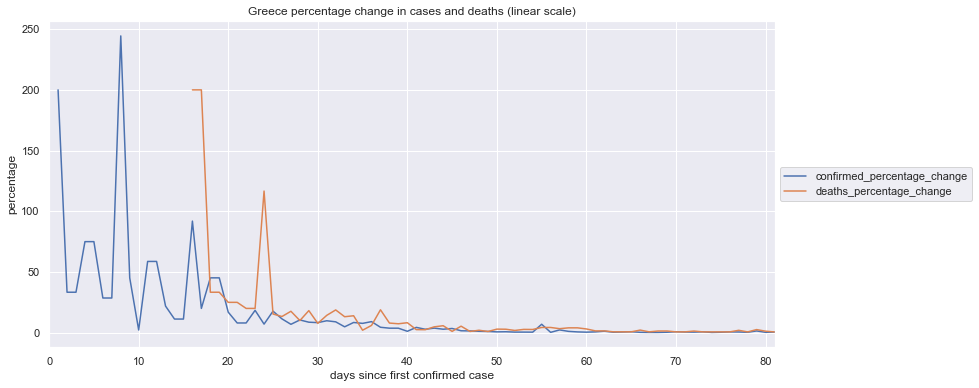

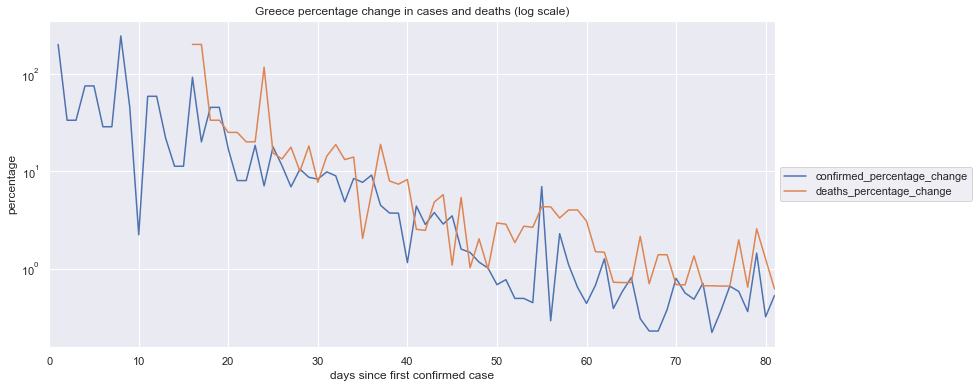

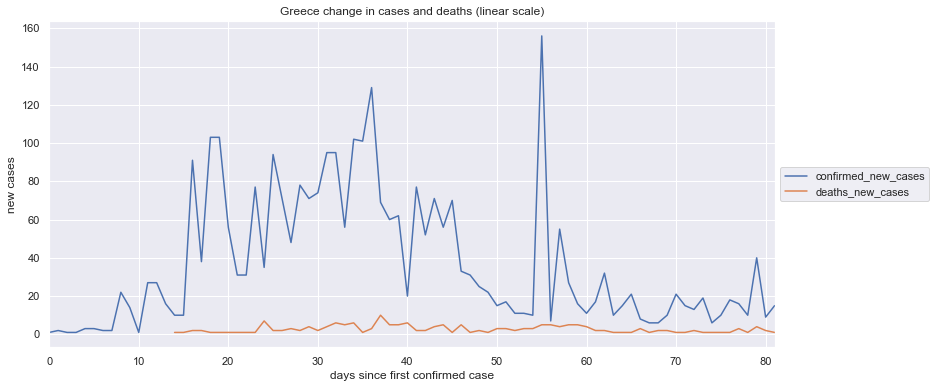

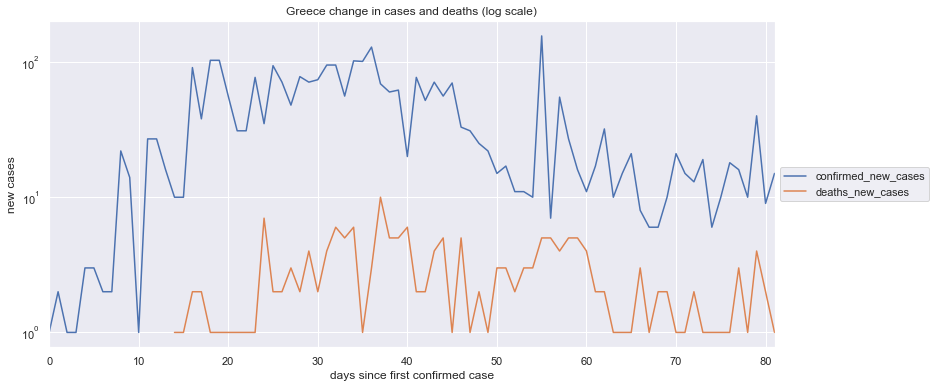

In [11]:
location_name = 'Greece'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Norway

confirmed  deaths recovered  confirmed_percentage_change  \
77       8175     229       NaN                     0.220669   
78       8196     232       NaN                     0.256881   
79       8219     232       NaN                     0.280625   
80       8237     232       NaN                     0.219005   
81       8249     232       NaN                     0.145684   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
77                                         366.599711                 
78                                         426.757939                 
79                                         466.203964                 
80                                         363.834268                 
81                                         242.026130                 

    deaths_percentage_change  \
77                  0.438596   
78                  1.310044   
79                       NaN   
80                       NaN   
81                       NaN   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
77                                         728.643725           
78                                        2176.385623           
79                                                NaN           
80                                                NaN           
81                                                NaN           

    confirmed_new_cases  deaths_new_cases  
77                 18.0               1.0  
78                 21.0               3.0  
79                 23.0               NaN  
80                 18.0               NaN  
81                 12.0               NaN

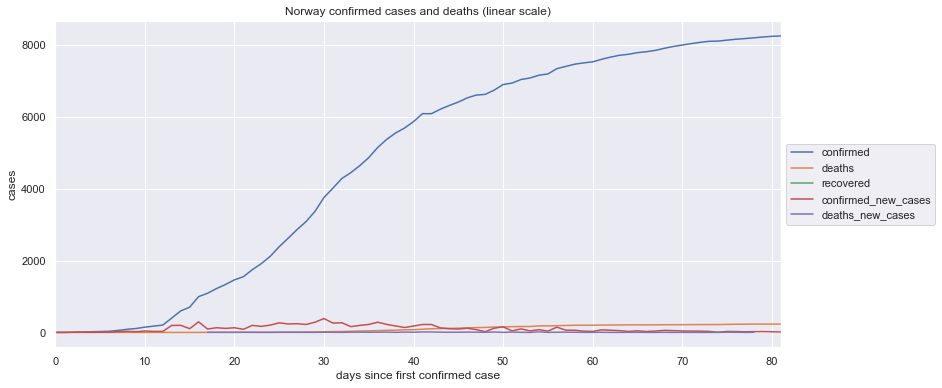

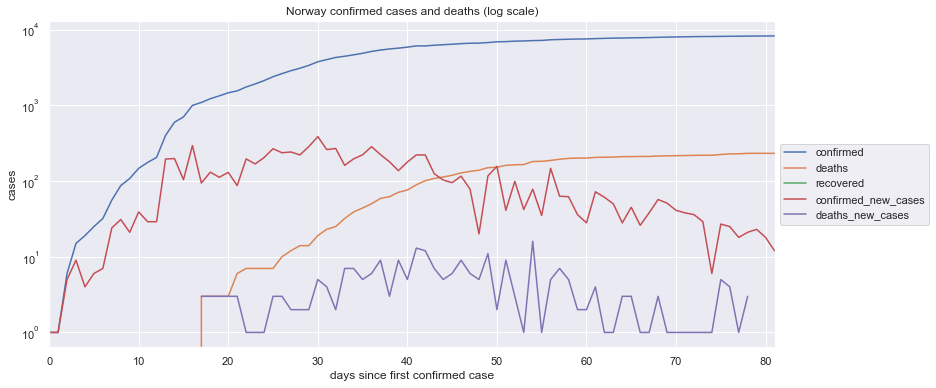

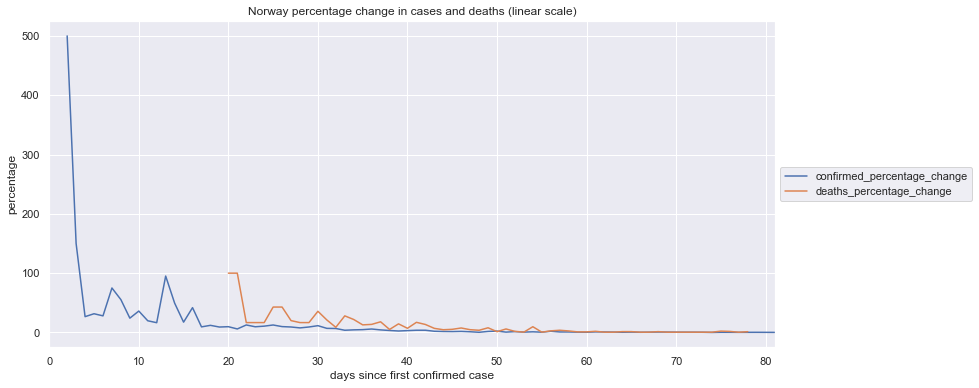

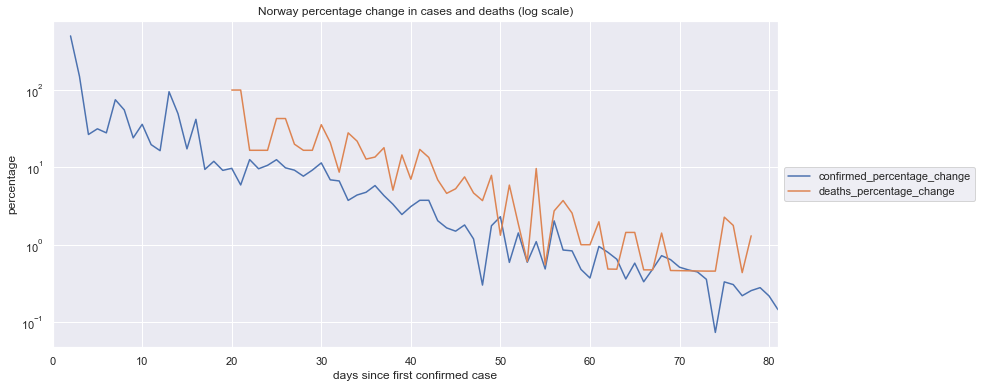

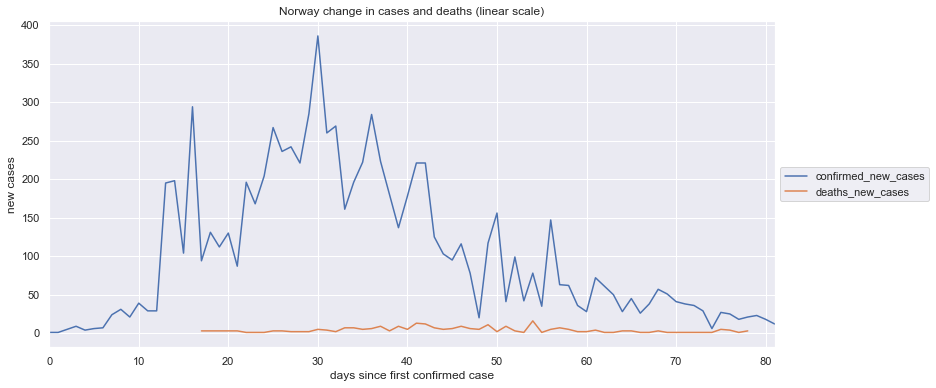

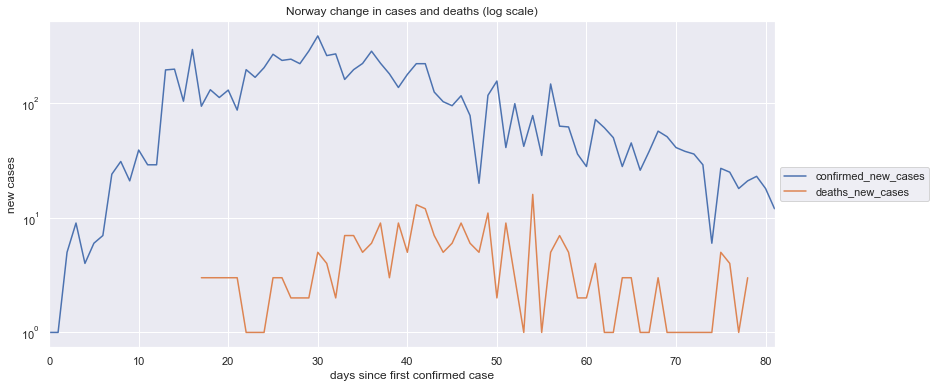

In [12]:
location_name = 'Norway'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Austria

confirmed  deaths recovered  confirmed_percentage_change  \
78      15997     624       NaN                     0.225550   
79      16058     626       NaN                     0.381321   
80      16109     628       NaN                     0.317599   
81      16201     629       NaN                     0.571109   
82      16242     629       NaN                     0.253071   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
78                                         743.527733                 
79                                        1257.031206                 
80                                        1046.968202                 
81                                        1882.669188                 
82                                         834.251130                 

    deaths_percentage_change  \
78                  0.160514   
79                  0.320513   
80                  0.319489   
81                  0.159236   
82                       NaN   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
78                                         529.135284           
79                                        1056.574622           
80                                        1053.198984           
81                                         524.922424           
82                                                NaN           

    confirmed_new_cases  deaths_new_cases  
78                 36.0               1.0  
79                 61.0               2.0  
80                 51.0               2.0  
81                 92.0               1.0  
82                 41.0               NaN

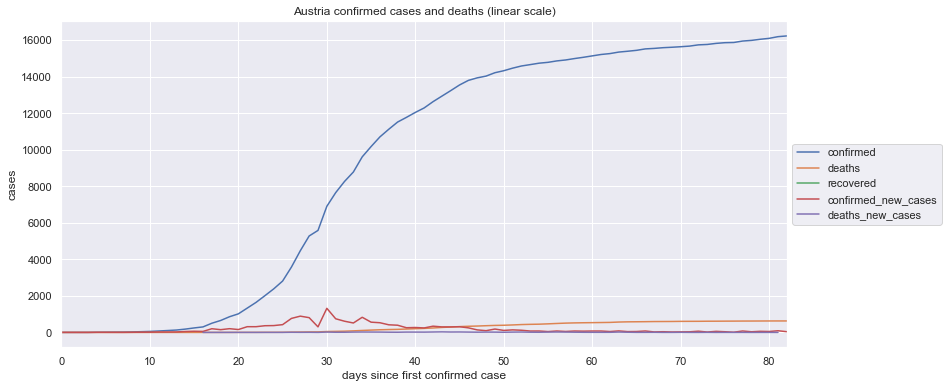

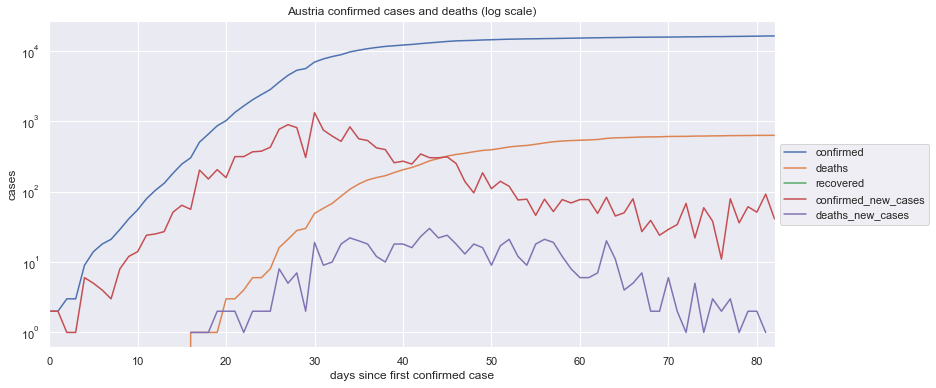

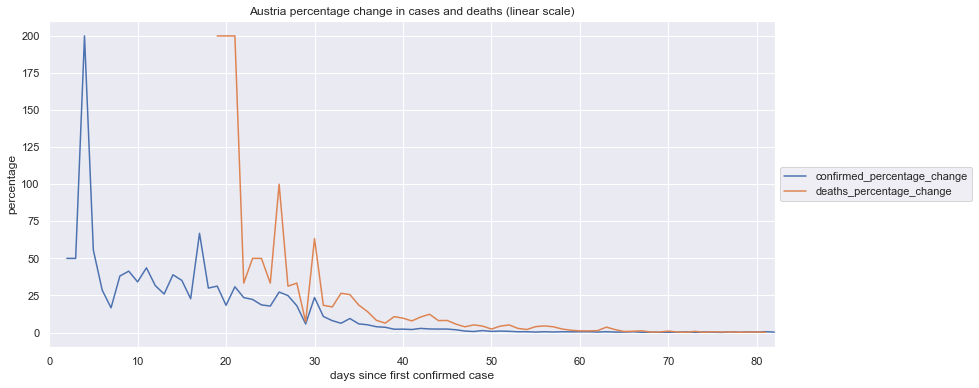

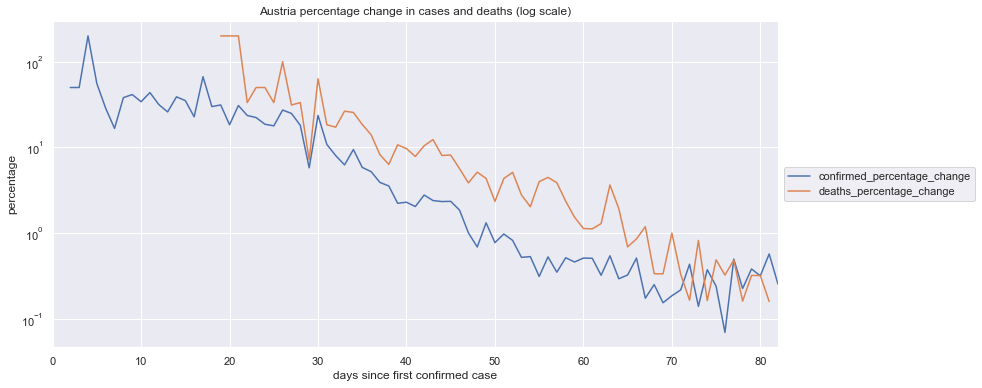

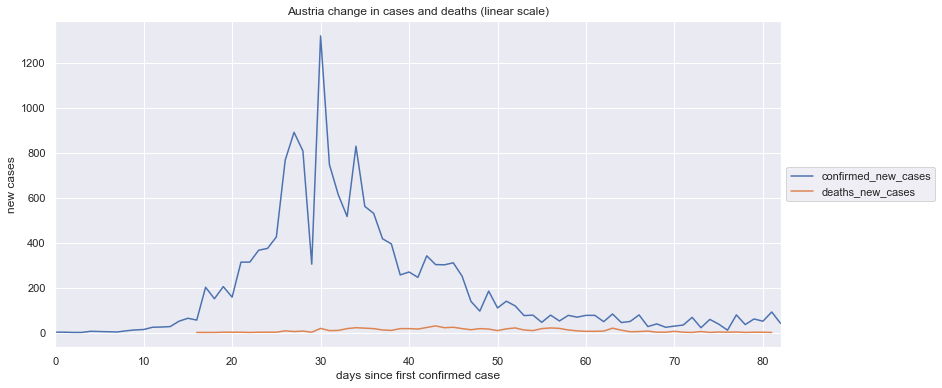

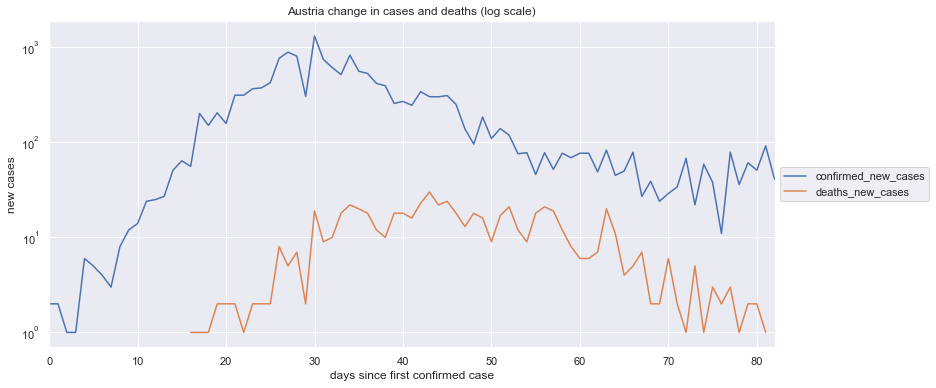

In [13]:
location_name = 'Austria'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Sweden

confirmed  deaths recovered  confirmed_percentage_change  \
103      27909    3460       NaN                     2.335729   
104      28582    3529       NaN                     2.411409   
105      29207    3646       NaN                     2.186691   
106      29677    3674       NaN                     1.609203   
107      30143    3679       NaN                     1.570240   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
103                                        8578.803046                 
104                                        8856.763373                 
105                                        8031.407386                 
106                                        5910.376683                 
107                                        5767.268531                 

     deaths_percentage_change  \
103                  4.437066   
104                  1.994220   
105                  3.315387   
106                  0.767965   
107                  0.136091   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
103                                       16296.718057           
104                                        7324.487550           
105                                       12176.948144           
106                                        2820.626749           
107                                         499.844716           

     confirmed_new_cases  deaths_new_cases  
103                637.0             147.0  
104                673.0              69.0  
105                625.0             117.0  
106                470.0              28.0  
107                466.0               5.0

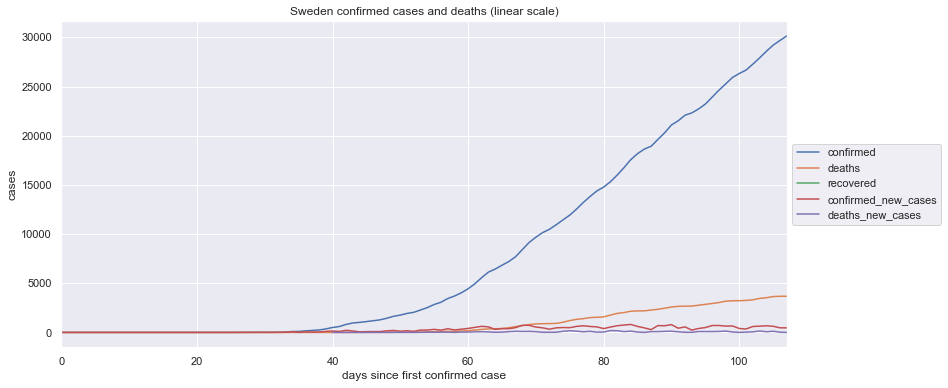

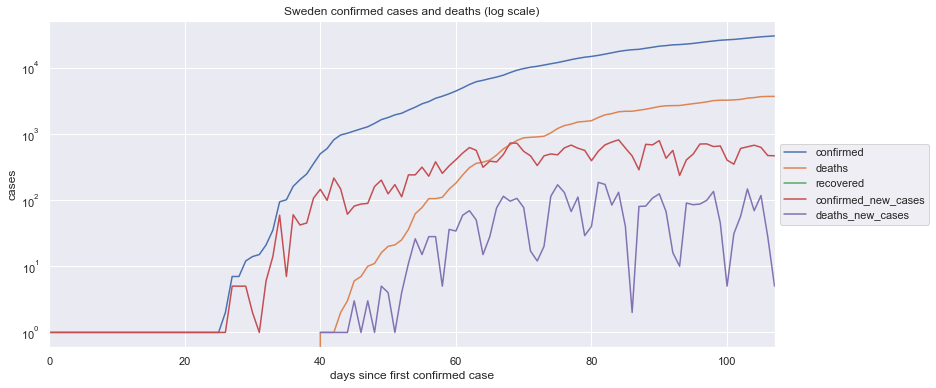

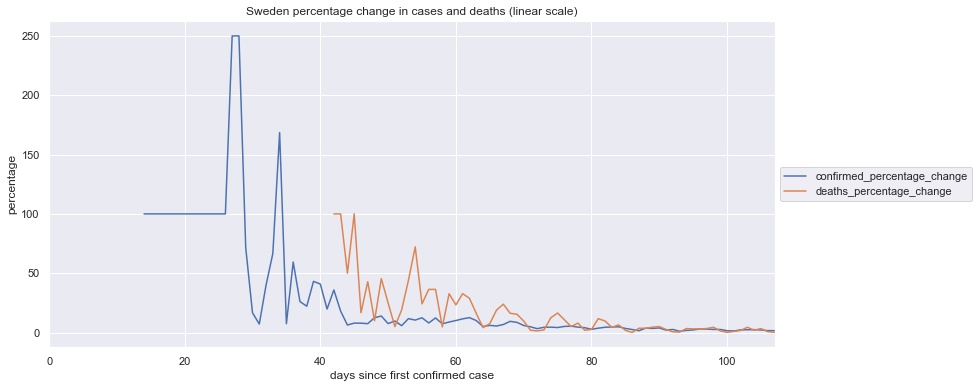

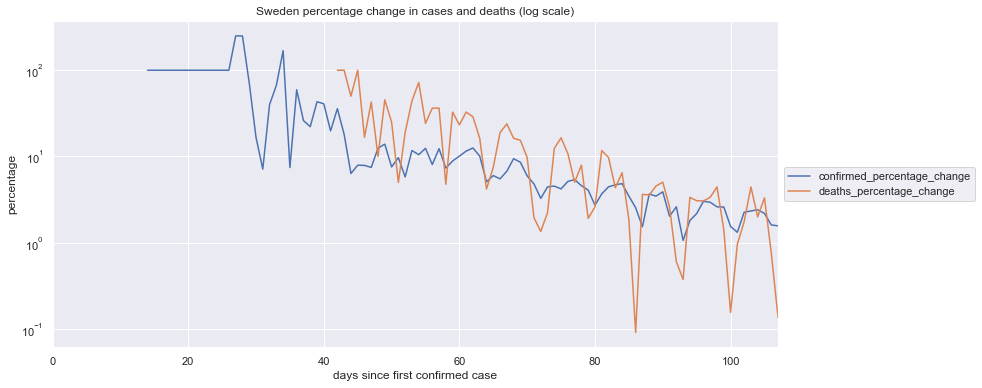

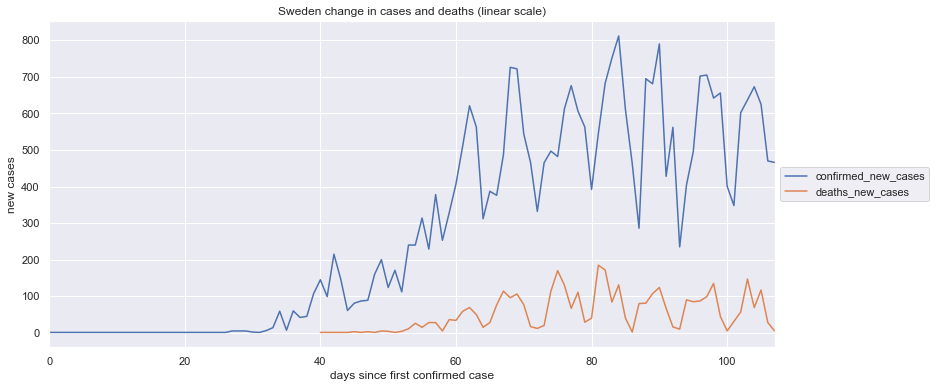

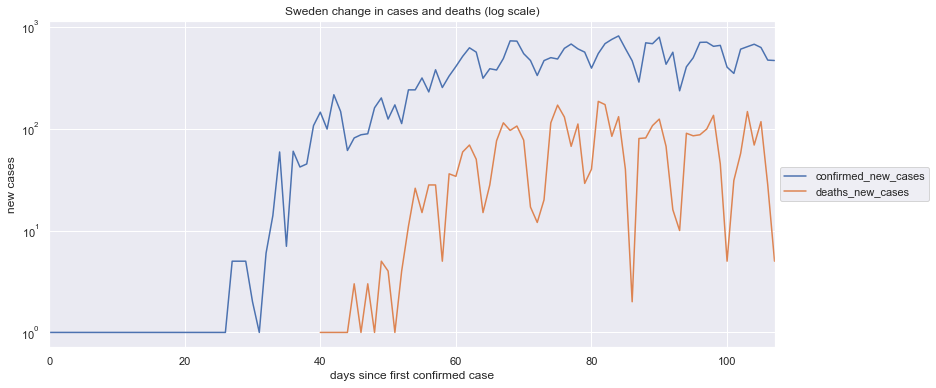

In [14]:
location_name = 'Sweden'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Ireland

confirmed  deaths recovered  confirmed_percentage_change  \
74      23401    1497       NaN                     0.684106   
75      23827    1506       NaN                     1.820435   
76      23956    1518       NaN                     0.541403   
77      24048    1533       NaN                     0.384037   
78      24112    1543       NaN                     0.266134   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
74                                        2265.999991                 
75                                        6029.918730                 
76                                        1793.315168                 
77                                        1272.066452                 
78                                         881.530387                 

    deaths_percentage_change  \
74                  0.604839   
75                  0.601202   
76                  0.796813   
77                  0.988142   
78                  0.652316   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
74                                        2003.437758           
75                                        1991.393042           
76                                        2639.323050           
77                                        3273.073545           
78                                        2160.698257           

    confirmed_new_cases  deaths_new_cases  
74                159.0               9.0  
75                426.0               9.0  
76                129.0              12.0  
77                 92.0              15.0  
78                 64.0              10.0

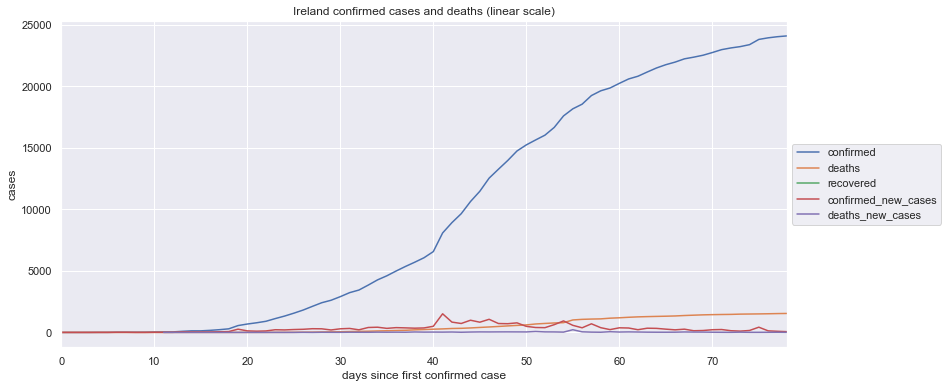

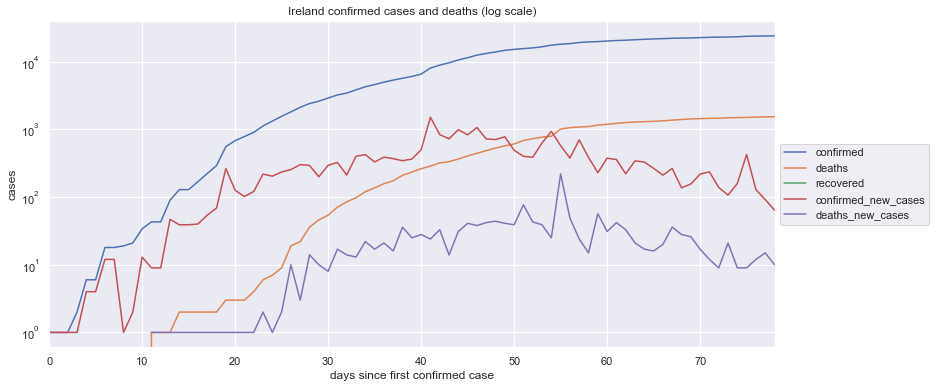

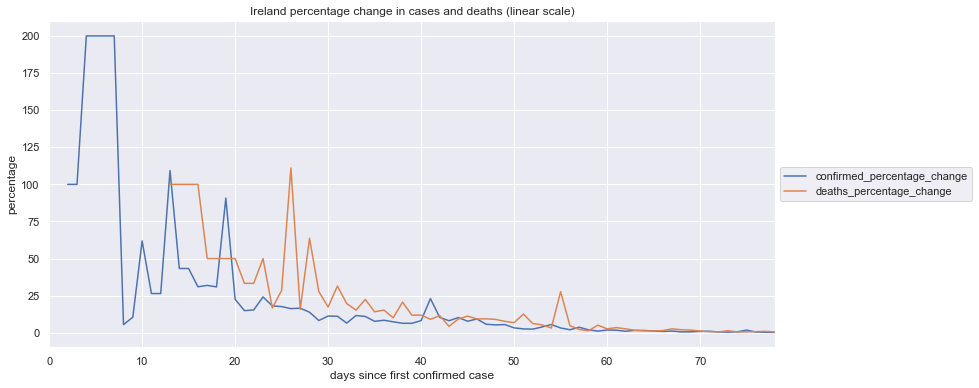

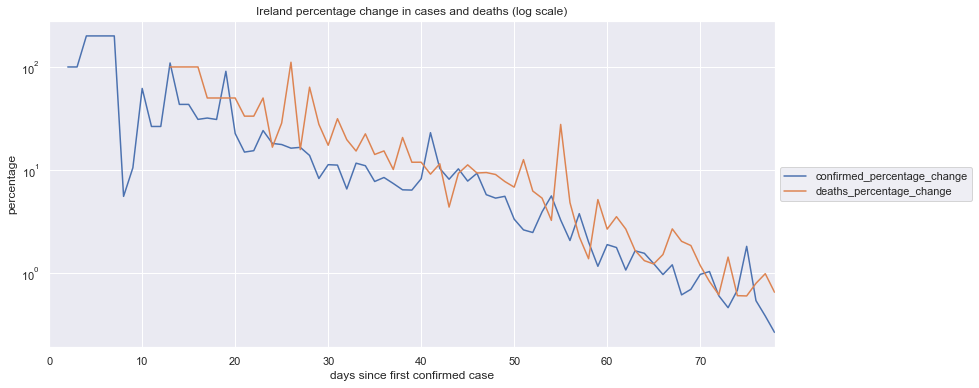

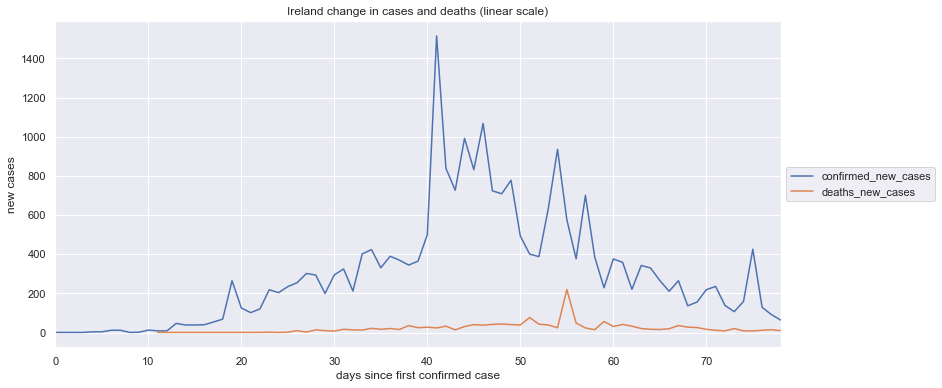

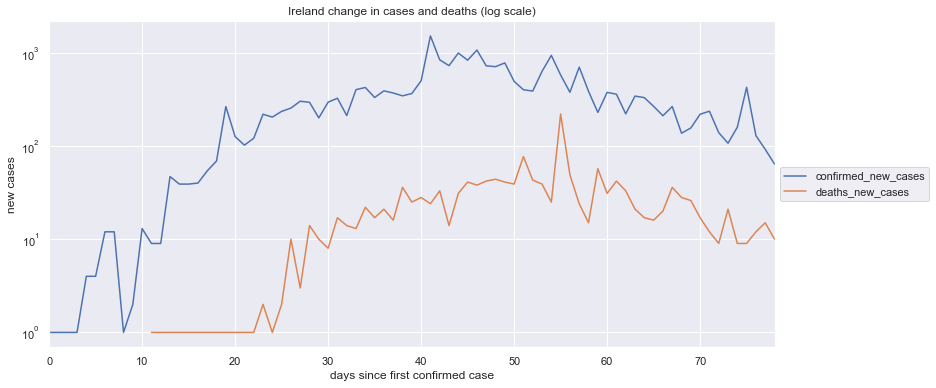

In [15]:
location_name = 'Ireland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United Kingdom (approximate)

confirmed  deaths recovered  confirmed_percentage_change  \
103     229705   33186       NaN                     1.431580   
104     233151   33614       NaN                     1.500185   
105     236711   33998       NaN                     1.526907   
106     240161   34466       NaN                     1.457473   
107     243695   34636       NaN                     1.471513   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
103                                       41569.779943                 
104                                       43561.898191                 
105                                       44337.855805                 
106                                       42321.653398                 
107                                       42729.325082                 

     deaths_percentage_change  \
103                  1.511073   
104                  1.289700   
105                  1.142381   
106                  1.376552   
107                  0.493240   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
103                                       43878.061231           
104                                       37449.914571           
105                                       33172.102589           
106                                       39971.868933           
107                                       14322.538848           

     confirmed_new_cases  deaths_new_cases  
103               3242.0             494.0  
104               3446.0             428.0  
105               3560.0             384.0  
106               3450.0             468.0  
107               3534.0             170.0

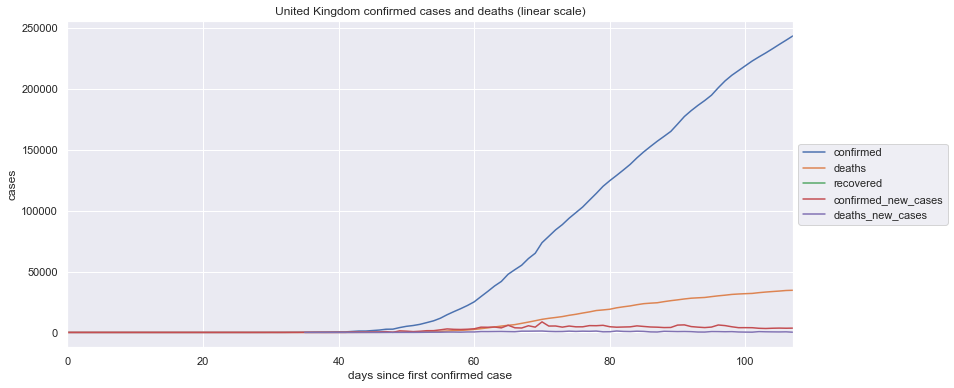

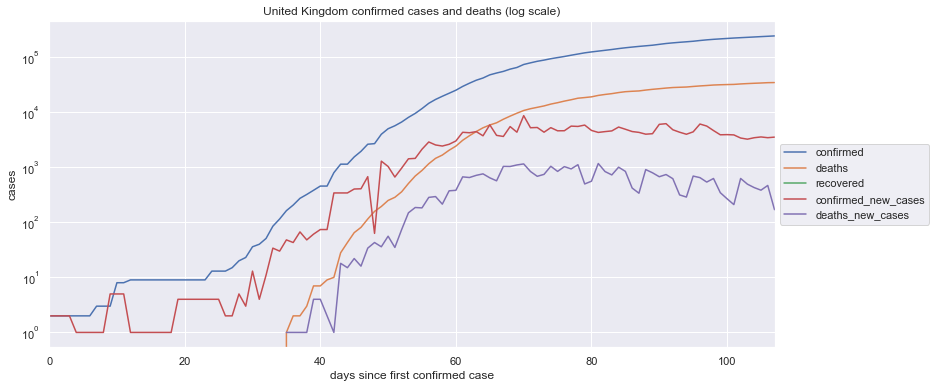

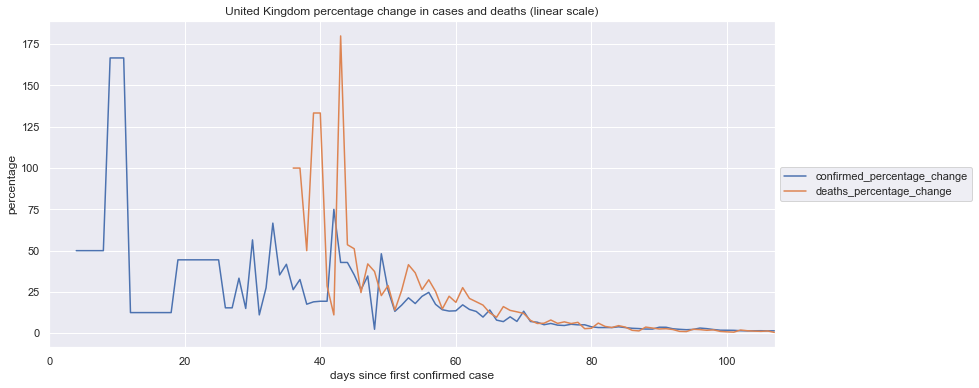

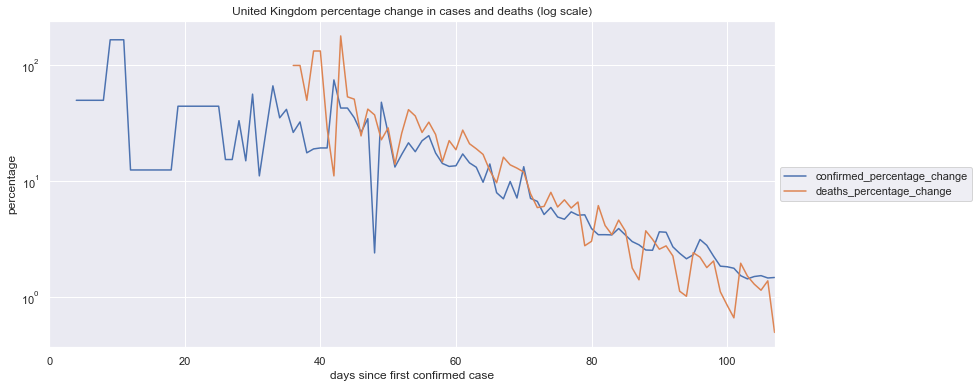

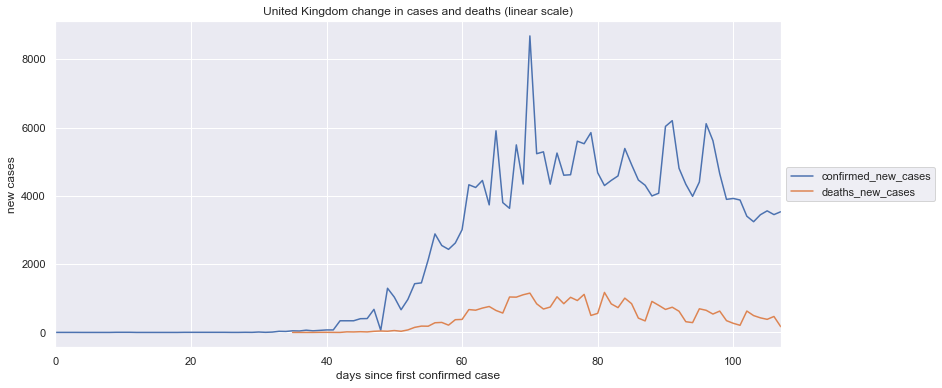

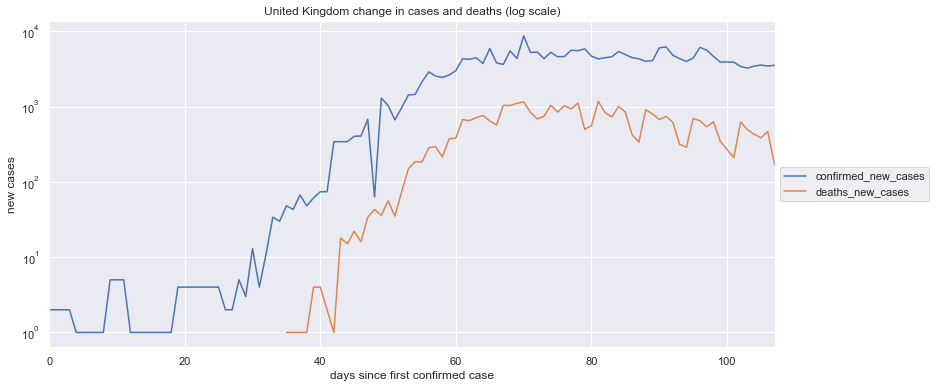

In [16]:
location_name = 'United Kingdom'
#location = df.query('country == @location_name')
location = df.query('country in ["United Kingdom"] and province == ""')
location = process(location)
locations[location_name] = location

# Germany

confirmed  deaths recovered  confirmed_percentage_change  \
107     174098    7861       NaN                     0.535309   
108     174478    7884       NaN                     0.218268   
109     175233    7897       NaN                     0.432719   
110     175752    7938       NaN                     0.296177   
111     176369    7962       NaN                     0.351063   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
107                                       17003.176274                 
108                                        6932.905850                 
109                                       13744.589233                 
110                                        9407.558976                 
111                                       11150.911682                 

     deaths_percentage_change  \
107                  1.589558   
108                  0.292584   
109                  0.164891   
110                  0.519185   
111                  0.302343   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
107                                       50489.593481           
108                                        9293.419206           
109                                        5237.478155           
110                                       16491.008162           
111                                        9603.413635           

     confirmed_new_cases  deaths_new_cases  
107                927.0             123.0  
108                380.0              23.0  
109                755.0              13.0  
110                519.0              41.0  
111                617.0              24.0

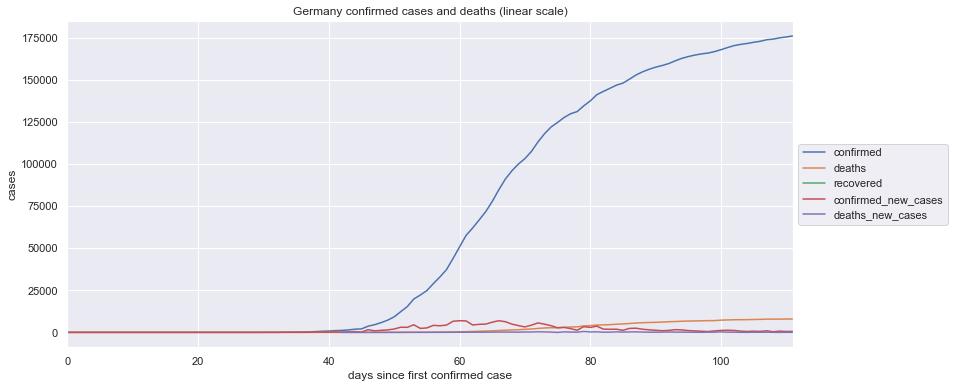

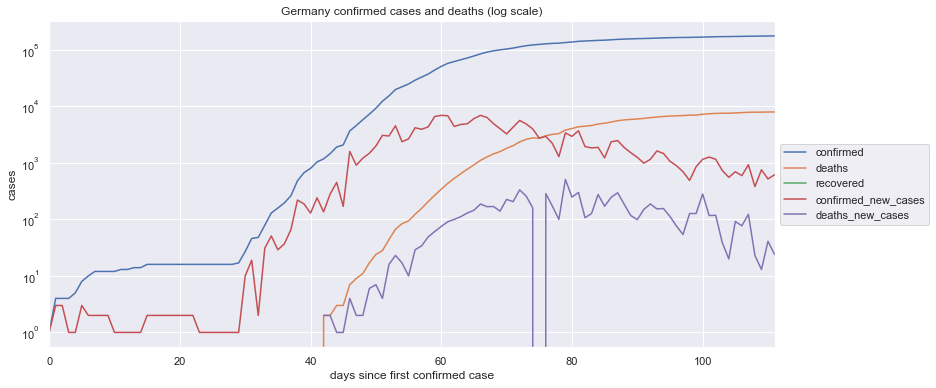

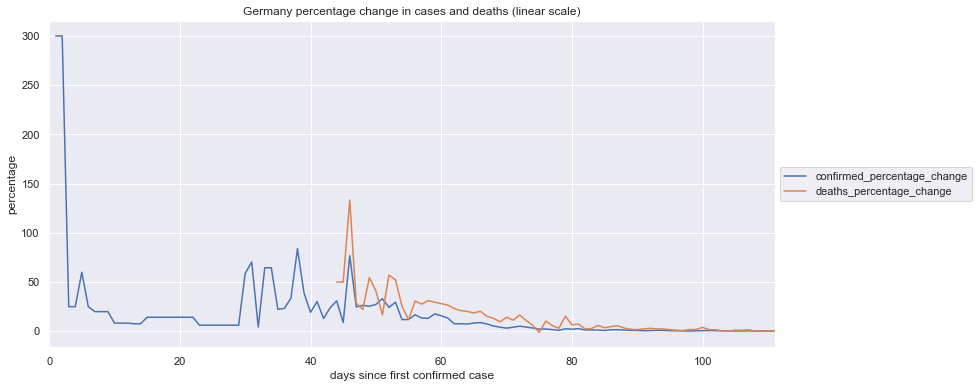

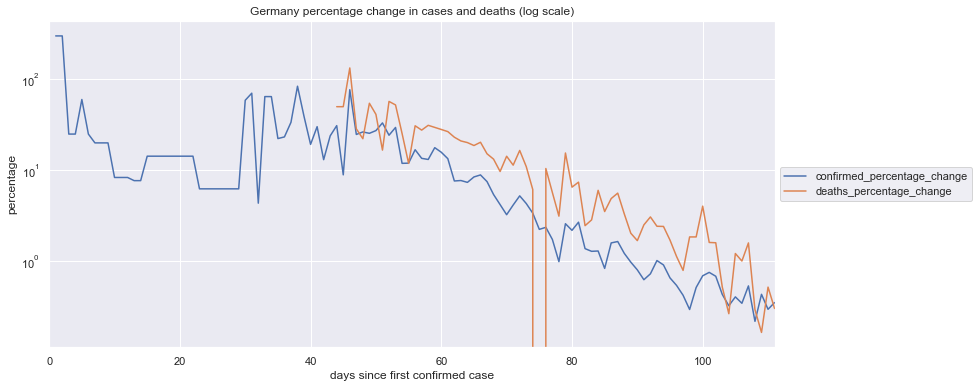

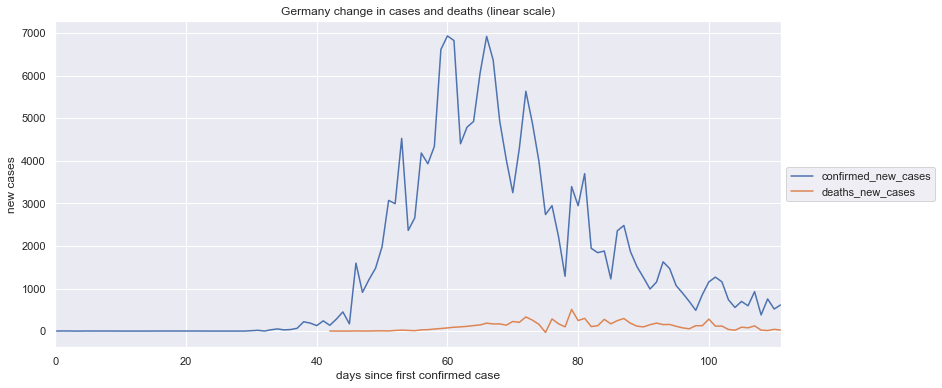

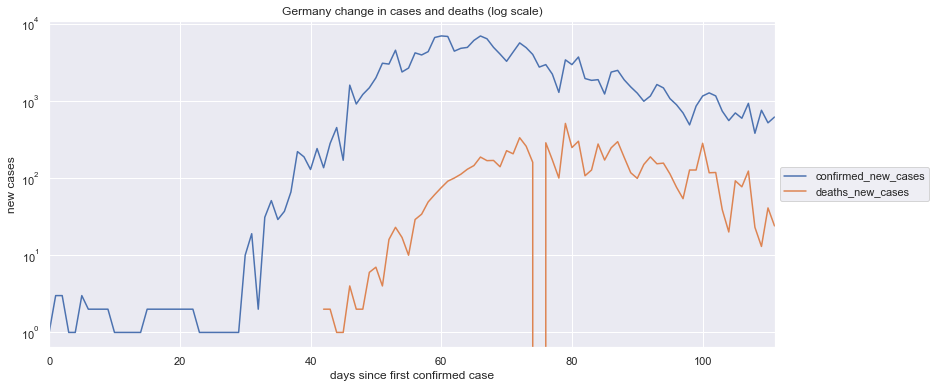

In [17]:
location_name = 'Germany'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Italy

confirmed  deaths recovered  confirmed_percentage_change  \
103     222104   31106       NaN                     0.401418   
104     223096   31368       NaN                     0.446638   
105     223885   31610       NaN                     0.353659   
106     224760   31763       NaN                     0.390826   
107     225435   31908       NaN                     0.300320   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
103                                       16875.296496                 
104                                       18776.311151                 
105                                       14867.577158                 
106                                       16430.017920                 
107                                       12625.242566                 

     deaths_percentage_change  \
103                  0.630843   
104                  0.842281   
105                  0.771487   
106                  0.484024   
107                  0.456506   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
103                                       26520.184293           
104                                       35408.873079           
105                                       32432.730863           
106                                       20348.008785           
107                                       19191.170733           

     confirmed_new_cases  deaths_new_cases  
103                888.0             195.0  
104                992.0             262.0  
105                789.0             242.0  
106                875.0             153.0  
107                675.0             145.0

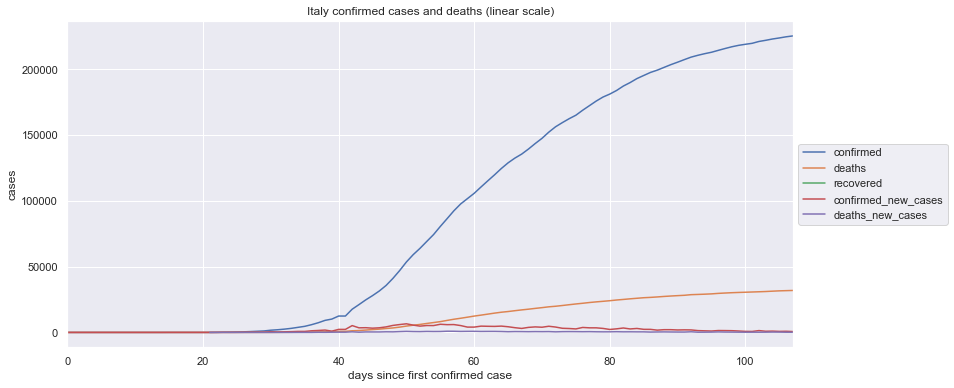

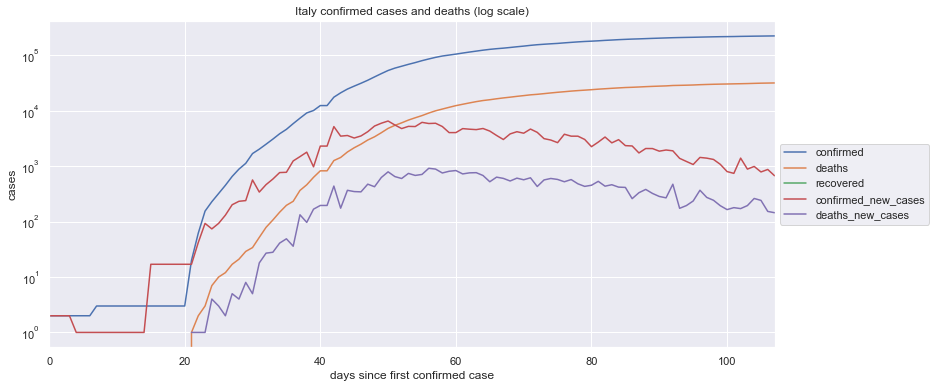

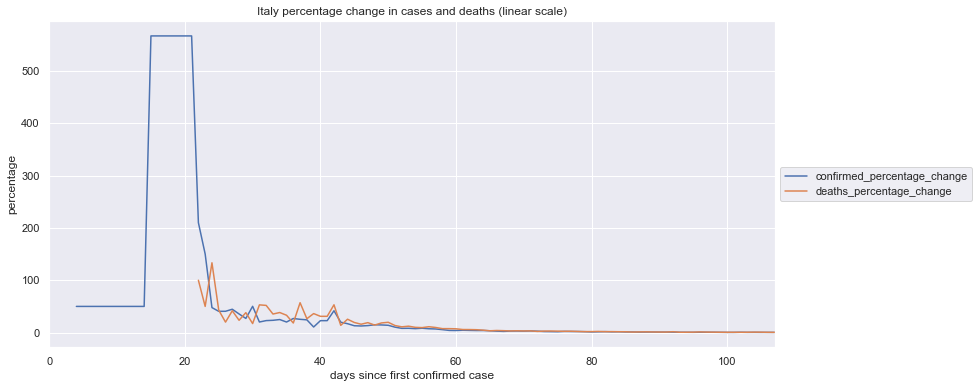

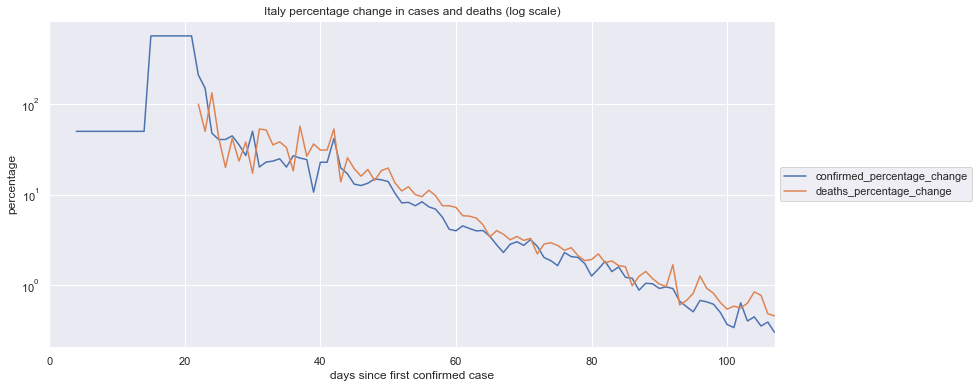

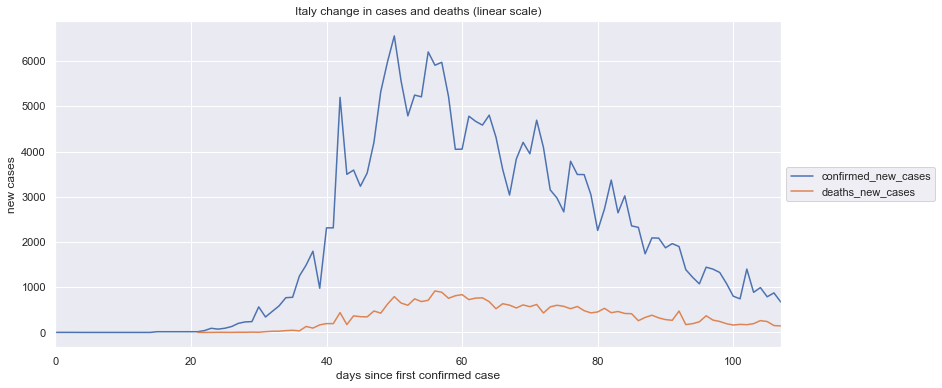

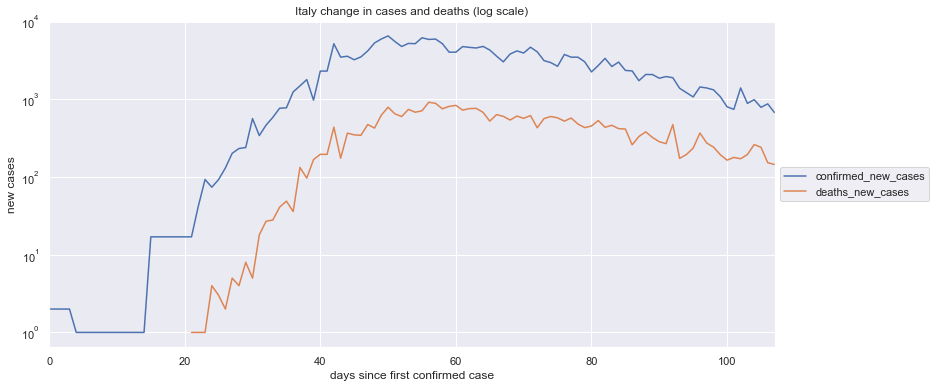

In [18]:
location_name = 'Italy'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United States of America

confirmed  deaths recovered  confirmed_percentage_change  \
112    1390406   84119       NaN                     1.535736   
113    1417774   85898       NaN                     1.968346   
114    1442824   87530       NaN                     1.766854   
115    1467820   88754       NaN                     1.732436   
116    1486757   89562       NaN                     1.290145   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
112                                      280349.969134                 
113                                      359323.300325                 
114                                      322540.811629                 
115                                      316257.701471                 
116                                      235517.037708                 

     deaths_percentage_change  \
112                  2.140706   
113                  2.114861   
114                  1.899928   
115                  1.398378   
116                  0.910382   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
112                                      390787.820087           
113                                      386069.771792           
114                                      346833.512616           
115                                      255275.091968           
116                                      166190.952771           

     confirmed_new_cases  deaths_new_cases  
112              21030.0            1763.0  
113              27368.0            1779.0  
114              25050.0            1632.0  
115              24996.0            1224.0  
116              18937.0             808.0

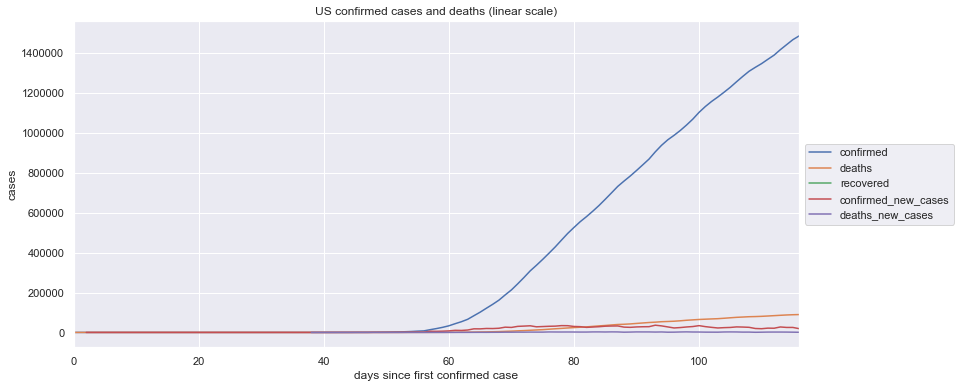

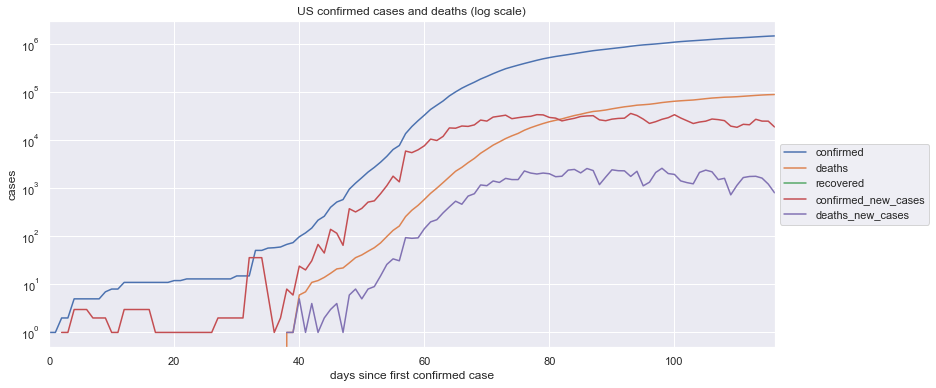

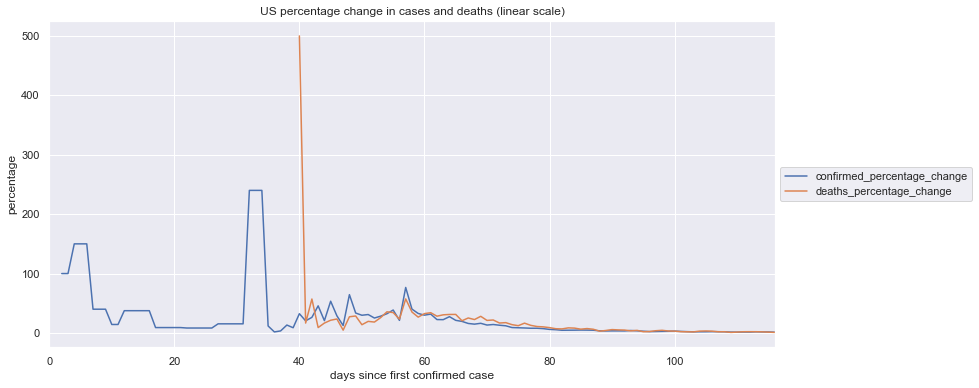

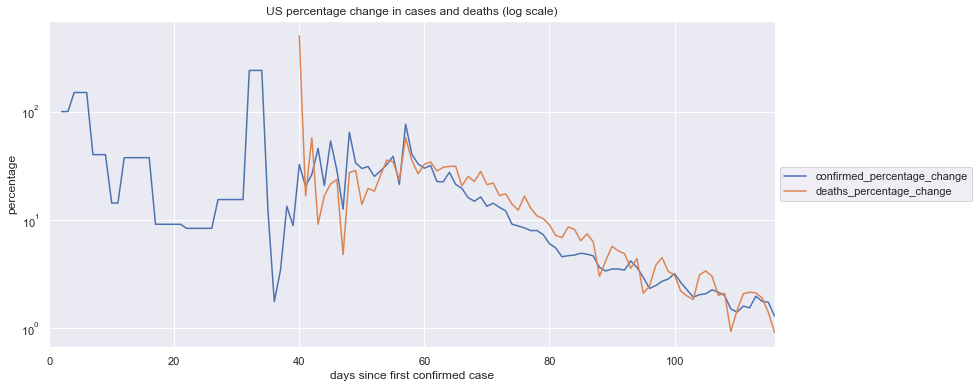

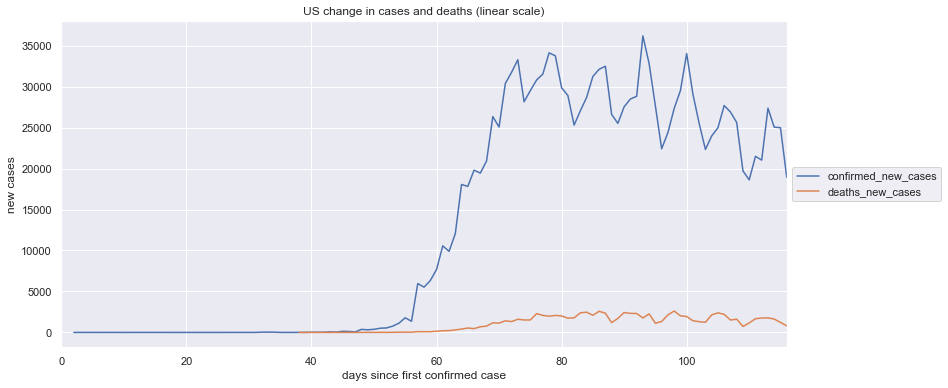

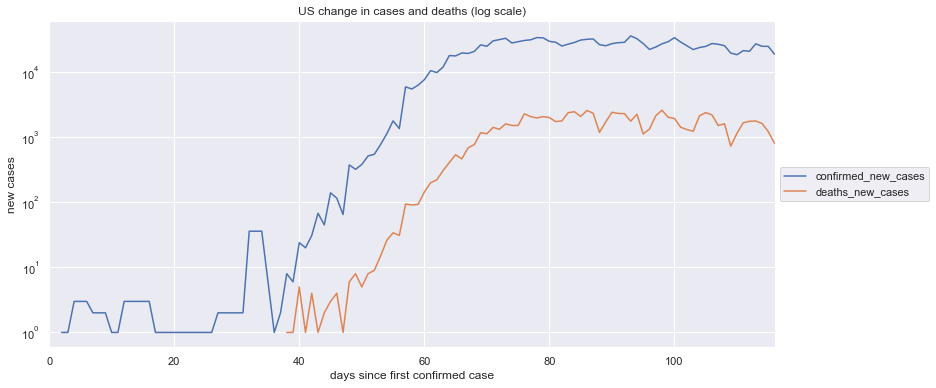

In [19]:
location_name = 'US'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

---

In [20]:
South_Korea              = locations['Korea, South']
Greece                   = locations['Greece']
Belgium                  = locations['Belgium']
Norway                   = locations['Norway']
Austria                  = locations['Austria']
Sweden                   = locations['Sweden']
Ireland                  = locations['Ireland']
United_Kingdom           = locations['United Kingdom']
Germany                  = locations['Germany']
Italy                    = locations['Italy']
United_States_of_America = locations['US']
Switzerland              = locations['Switzerland']

locations_list           = [South_Korea,
                            Belgium,
                            Greece,
                            Norway,
                            Austria,
                            Sweden,
                            Ireland,
                            United_Kingdom,
                            Germany,
                            Italy,
                            United_States_of_America,
                            Switzerland]

In [21]:
#South_Korea

In [22]:
_df = pd.merge( South_Korea.add_suffix('_South_Korea'), Sweden.add_suffix('_Sweden'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Ireland.add_suffix('_Ireland'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                     United_Kingdom.add_suffix('_United_Kingdom'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Germany.add_suffix('_Germany'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                       Italy.add_suffix('_Italy'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df, United_States_of_America.add_suffix('_United_States_of_America'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Greece.add_suffix('_Greece'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Norway.add_suffix('_Norway'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Austria.add_suffix('_Austria'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Belgium.add_suffix('_Belgium'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                           Switzerland.add_suffix('_Switzerland'), how='outer', left_index=True, right_index=True)
_df.tail()

confirmed_South_Korea  deaths_South_Korea recovered_South_Korea  \
112                  10991                 260                   NaN   
113                  11018                 260                   NaN   
114                  11037                 262                   NaN   
115                  11050                 262                   NaN   
116                  11065                 263                   NaN   

     confirmed_percentage_change_South_Korea  \
112                                 0.264550   
113                                 0.245656   
114                                 0.172445   
115                                 0.117786   
116                                 0.135747   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor_South_Korea  \
112                                         856.748293                             
113                                         795.557554                             
114                                         558.464897                             
115                                         381.449770                             
116                                         439.616545                             

     deaths_percentage_change_South_Korea  \
112                              0.386100   
113                              0.386100   
114                              0.769231   
115                              0.769231   
116                              0.381679   

     deaths_percentage_change_by_half_mean_deaths_cases_factor_South_Korea  \
112                                        1250.389400                       
113                                        1250.389400                       
114                                        2491.160421                       
115                                        2491.160421                       
116                                        1236.071965                       

     confirmed_new_cases_South_Korea  deaths_new_cases_South_Korea  \
112                             29.0                           1.0   
113                             27.0                           1.0   
114                             19.0                           2.0   
115                             13.0                           2.0   
116                             15.0                           1.0   

     confirmed_Sweden  deaths_Sweden recovered_Sweden  \
112               NaN            NaN              NaN   
113               NaN            NaN              NaN   
114               NaN            NaN              NaN   
115               NaN            NaN              NaN   
116               NaN            NaN              NaN   

     confirmed_percentage_change_Sweden  \
112                                 NaN   
113                                 NaN   
114                                 NaN   
115                                 NaN   
116                                 NaN   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Sweden  \
112                                                NaN                        
113                                                NaN                        
114                                                NaN                        
115                                                NaN                        
116                                                NaN                        

     deaths_percentage_change_Sweden  \
112                              NaN   
113                              NaN   
114                              NaN   
115                              NaN   
116                              NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor_Sweden  \
112                                                NaN                  
113                                                NaN                  
114                                                NaN                  
115    

# comparisons: confirmed cases

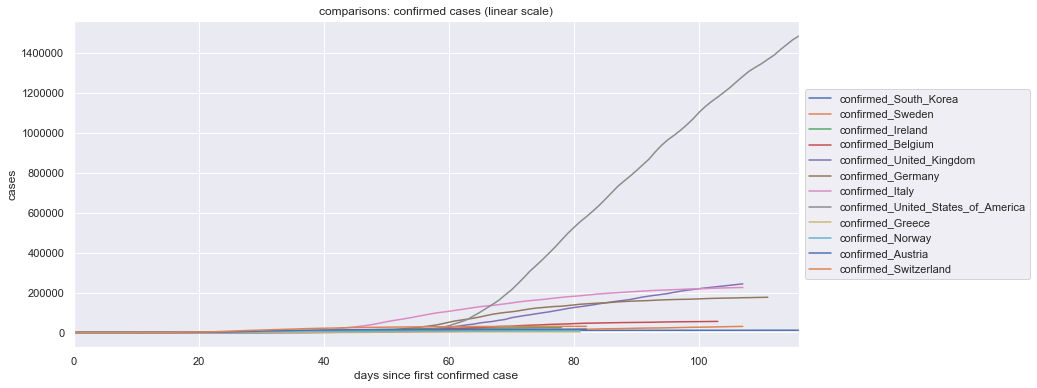

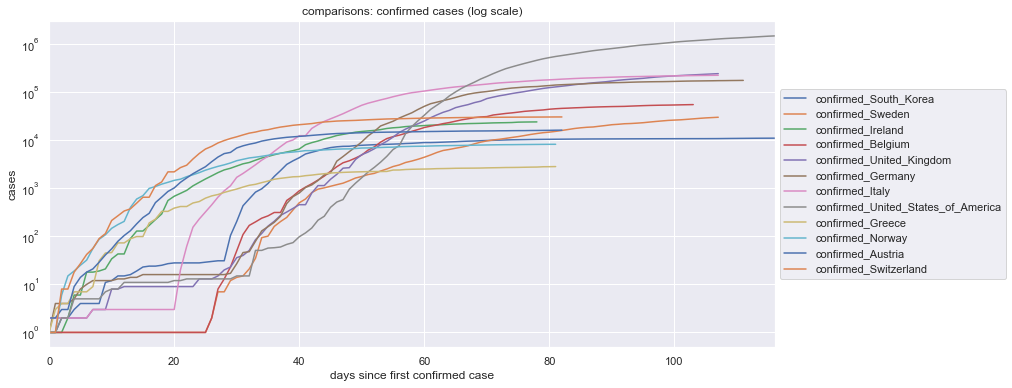

In [23]:
__df = _df[[
    'confirmed_South_Korea',
    'confirmed_Sweden',
    'confirmed_Ireland',
    'confirmed_Belgium',
    'confirmed_United_Kingdom',
    'confirmed_Germany',
    'confirmed_Italy',
    'confirmed_United_States_of_America',
    'confirmed_Greece',
    'confirmed_Norway',
    'confirmed_Austria',
    'confirmed_Switzerland']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: confirmed new cases

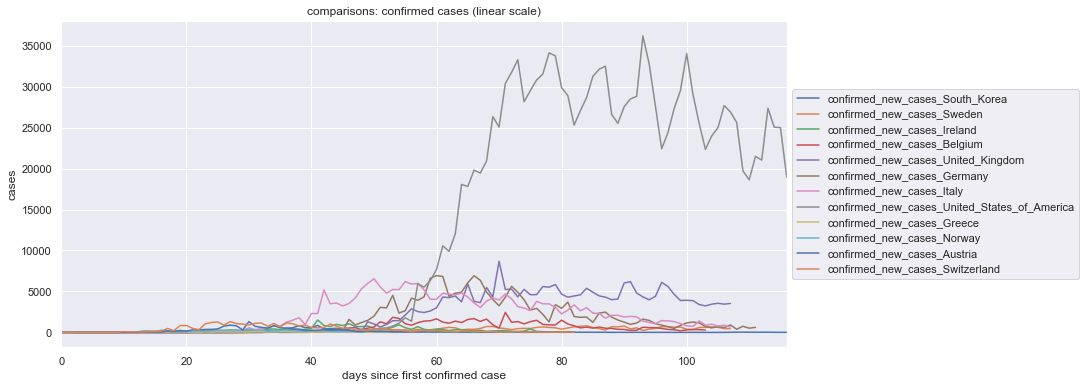

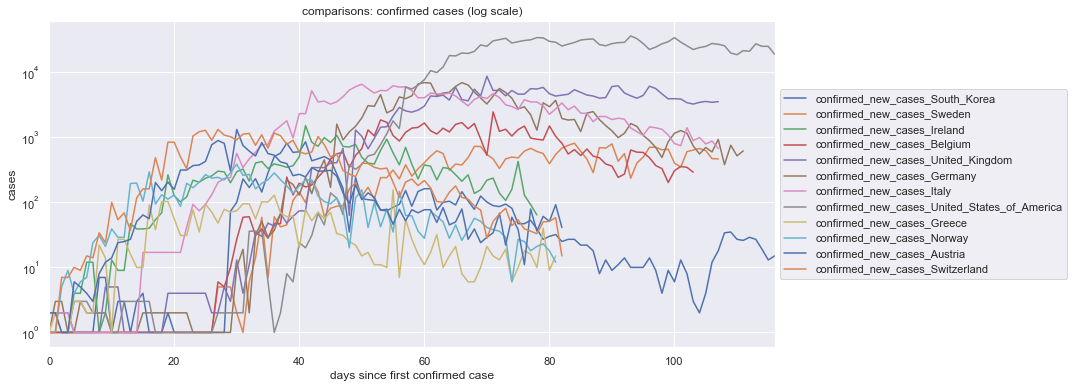

In [24]:
__df = _df[[
    'confirmed_new_cases_South_Korea',
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_United_States_of_America',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

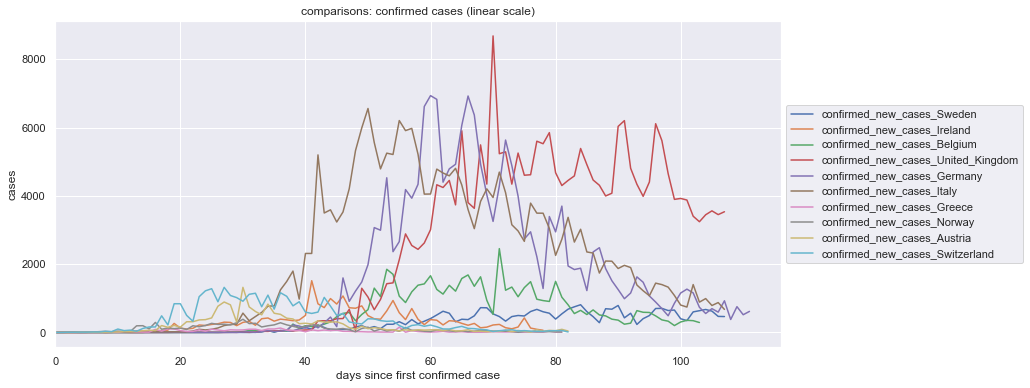

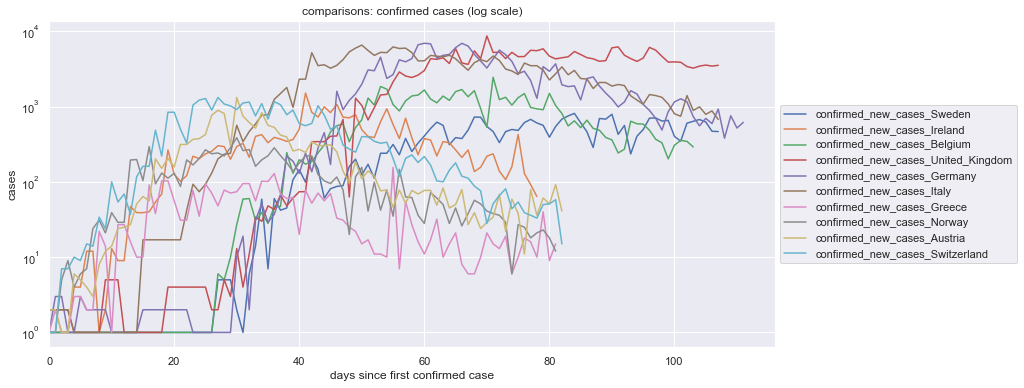

In [25]:
# European
__df = _df[[
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: deaths

deaths_South_Korea  deaths_Sweden  deaths_Ireland  deaths_Belgium  \
112                 260            NaN             NaN             NaN   
113                 260            NaN             NaN             NaN   
114                 262            NaN             NaN             NaN   
115                 262            NaN             NaN             NaN   
116                 263            NaN             NaN             NaN   

     deaths_United_Kingdom  deaths_Germany  deaths_Italy  \
112                    NaN             NaN           NaN   
113                    NaN             NaN           NaN   
114                    NaN             NaN           NaN   
115                    NaN             NaN           NaN   
116                    NaN             NaN           NaN   

     deaths_United_States_of_America  deaths_Greece  deaths_Norway  \
112                            84119            NaN            NaN   
113                            85898            NaN            NaN   
114                            87530            NaN            NaN   
115                            88754            NaN            NaN   
116                            89562            NaN            NaN   

     deaths_Austria  deaths_Switzerland  
112             NaN                 NaN  
113             NaN                 NaN  
114             NaN                 NaN  
115             NaN                 NaN  
116             NaN                 NaN

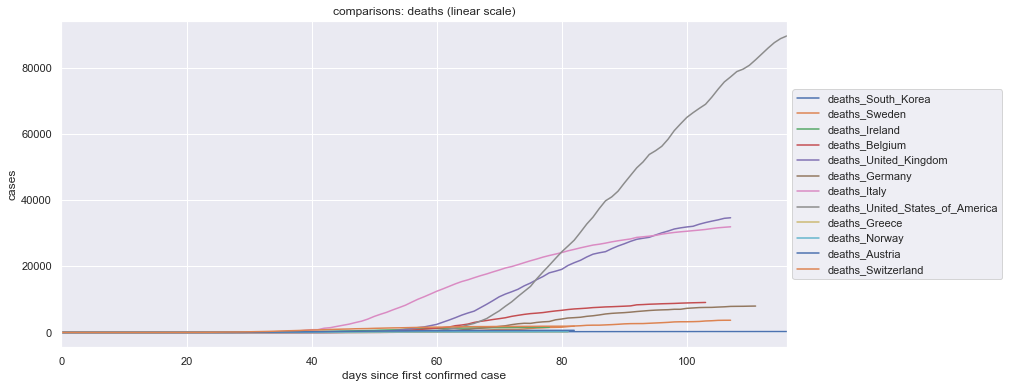

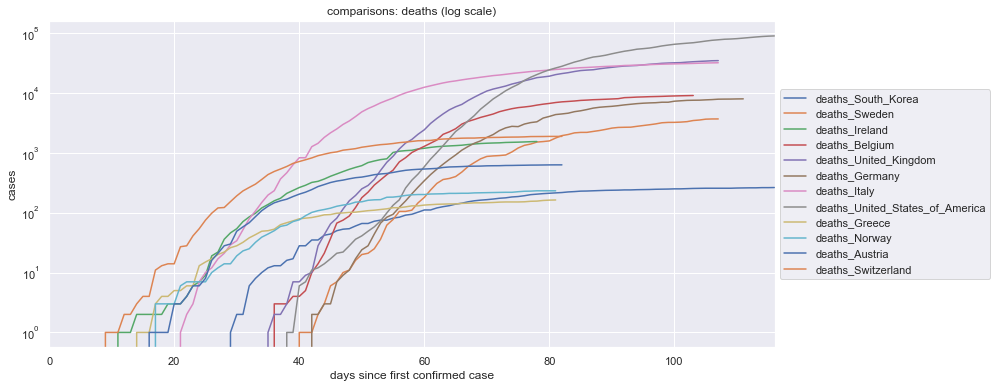

In [26]:
__df = _df[[
    'deaths_South_Korea',
    'deaths_Sweden',
    'deaths_Ireland',
    'deaths_Belgium',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_United_States_of_America',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_Sweden  deaths_Belgium  deaths_Ireland  deaths_United_Kingdom  \
112            NaN             NaN             NaN                    NaN   
113            NaN             NaN             NaN                    NaN   
114            NaN             NaN             NaN                    NaN   
115            NaN             NaN             NaN                    NaN   
116            NaN             NaN             NaN                    NaN   

     deaths_Germany  deaths_Italy  deaths_Greece  deaths_Norway  \
112             NaN           NaN            NaN            NaN   
113             NaN           NaN            NaN            NaN   
114             NaN           NaN            NaN            NaN   
115             NaN           NaN            NaN            NaN   
116             NaN           NaN            NaN            NaN   

     deaths_Austria  deaths_Switzerland  
112             NaN                 NaN  
113             NaN                 NaN  
114             NaN                 NaN  
115             NaN                 NaN  
116             NaN                 NaN

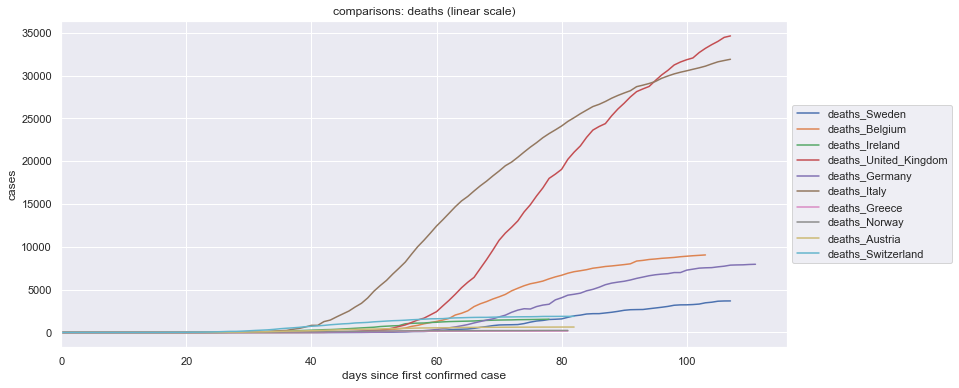

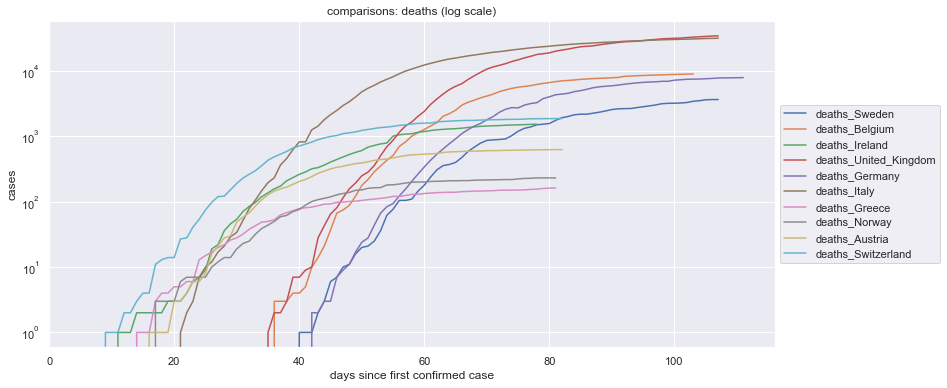

In [27]:
# some European countries
__df = _df[[
    'deaths_Sweden',
    'deaths_Belgium',
    'deaths_Ireland',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: new deaths

deaths_new_cases_South_Korea  deaths_new_cases_Sweden  \
112                           1.0                      NaN   
113                           1.0                      NaN   
114                           2.0                      NaN   
115                           2.0                      NaN   
116                           1.0                      NaN   

     deaths_new_cases_Ireland  deaths_new_cases_Belgium  \
112                       NaN                       NaN   
113                       NaN                       NaN   
114                       NaN                       NaN   
115                       NaN                       NaN   
116                       NaN                       NaN   

     deaths_new_cases_United_Kingdom  deaths_new_cases_Germany  \
112                              NaN                       NaN   
113                              NaN                       NaN   
114                              NaN                       NaN   
115                              NaN                       NaN   
116                              NaN                       NaN   

     deaths_new_cases_Italy  deaths_new_cases_United_States_of_America  \
112                     NaN                                     1763.0   
113                     NaN                                     1779.0   
114                     NaN                                     1632.0   
115                     NaN                                     1224.0   
116                     NaN                                      808.0   

     deaths_new_cases_Greece  deaths_new_cases_Norway  \
112                      NaN                      NaN   
113                      NaN                      NaN   
114                      NaN                      NaN   
115                      NaN                      NaN   
116                      NaN                      NaN   

     deaths_new_cases_Austria  deaths_new_cases_Switzerland  
112                       NaN                           NaN  
113                       NaN                           NaN  
114                       NaN                           NaN  
115                       NaN                           NaN  
116                       NaN                           NaN

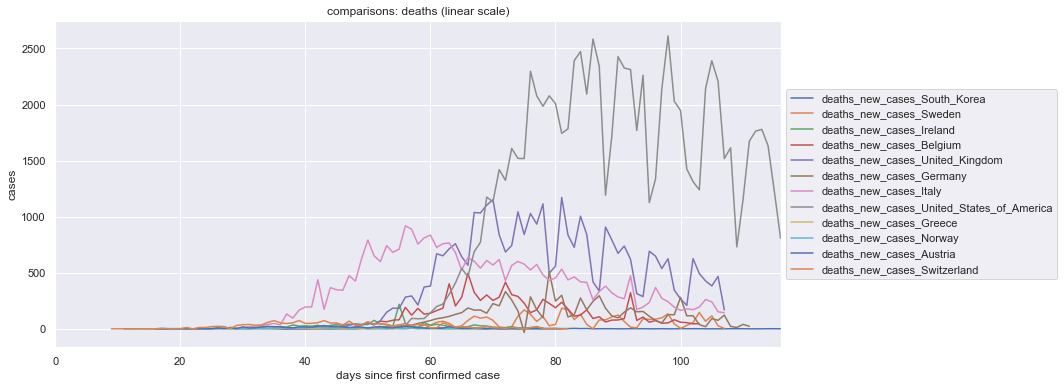

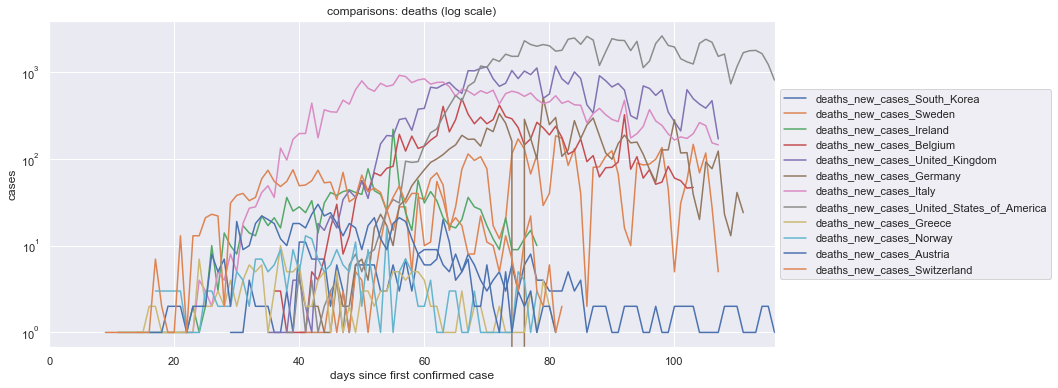

In [28]:
__df = _df[[
    'deaths_new_cases_South_Korea',
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_United_States_of_America',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_new_cases_Sweden  deaths_new_cases_Belgium  \
112                      NaN                       NaN   
113                      NaN                       NaN   
114                      NaN                       NaN   
115                      NaN                       NaN   
116                      NaN                       NaN   

     deaths_new_cases_Ireland  deaths_new_cases_United_Kingdom  \
112                       NaN                              NaN   
113                       NaN                              NaN   
114                       NaN                              NaN   
115                       NaN                              NaN   
116                       NaN                              NaN   

     deaths_new_cases_Germany  deaths_new_cases_Italy  \
112                       NaN                     NaN   
113                       NaN                     NaN   
114                       NaN                     NaN   
115                       NaN                     NaN   
116                       NaN                     NaN   

     deaths_new_cases_Greece  deaths_new_cases_Norway  \
112                      NaN                      NaN   
113                      NaN                      NaN   
114                      NaN                      NaN   
115                      NaN                      NaN   
116                      NaN                      NaN   

     deaths_new_cases_Austria  deaths_new_cases_Switzerland  
112                       NaN                           NaN  
113                       NaN                           NaN  
114                       NaN                           NaN  
115                       NaN                           NaN  
116                       NaN                           NaN

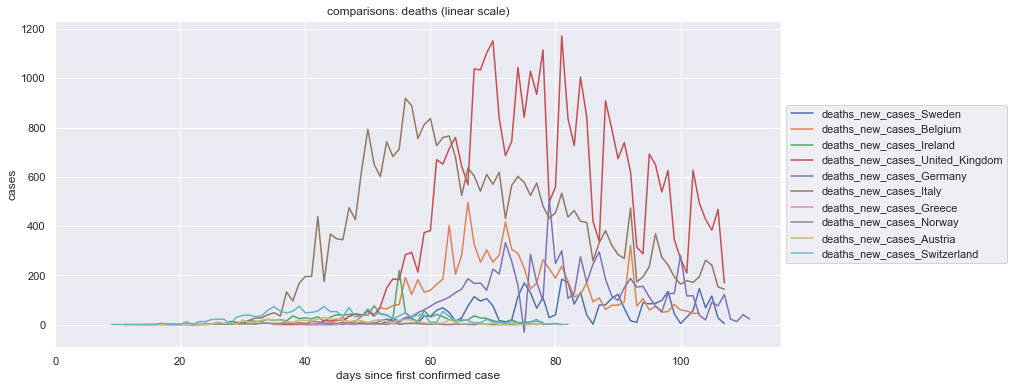

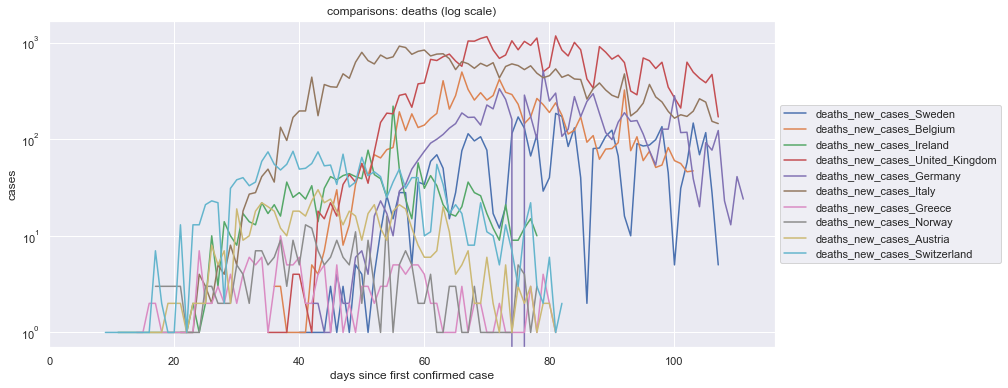

In [29]:
# European
__df = _df[[
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: changes in confirmed cases

confirmed_percentage_change_South_Korea  \
112                                 0.264550   
113                                 0.245656   
114                                 0.172445   
115                                 0.117786   
116                                 0.135747   

     confirmed_percentage_change_Sweden  confirmed_percentage_change_Ireland  \
112                                 NaN                                  NaN   
113                                 NaN                                  NaN   
114                                 NaN                                  NaN   
115                                 NaN                                  NaN   
116                                 NaN                                  NaN   

     confirmed_percentage_change_Belgium  \
112                                  NaN   
113                                  NaN   
114                                  NaN   
115                                  NaN   
116                                  NaN   

     confirmed_percentage_change_United_Kingdom  \
112                                         NaN   
113                                         NaN   
114                                         NaN   
115                                         NaN   
116                                         NaN   

     confirmed_percentage_change_Germany  confirmed_percentage_change_Italy  \
112                                  NaN                                NaN   
113                                  NaN                                NaN   
114                                  NaN                                NaN   
115                                  NaN                                NaN   
116                                  NaN                                NaN   

     confirmed_percentage_change_United_States_of_America  \
112                                           1.535736      
113                                           1.968346      
114                                           1.766854      
115                                           1.732436      
116                                           1.290145      

     confirmed_percentage_change_Greece  confirmed_percentage_change_Norway  \
112                                 NaN                                 NaN   
113                                 NaN                                 NaN   
114                                 NaN                                 NaN   
115                                 NaN                                 NaN   
116                                 NaN                                 NaN   

     confirmed_percentage_change_Austria  \
112                                  NaN   
113                                  NaN   
114                                  NaN   
115                                  NaN   
116                                  NaN   

     confirmed_percentage_change_Switzerland  
112                                      NaN  
113                                      NaN  
114                                      NaN  
115                                      NaN  
116                                      NaN

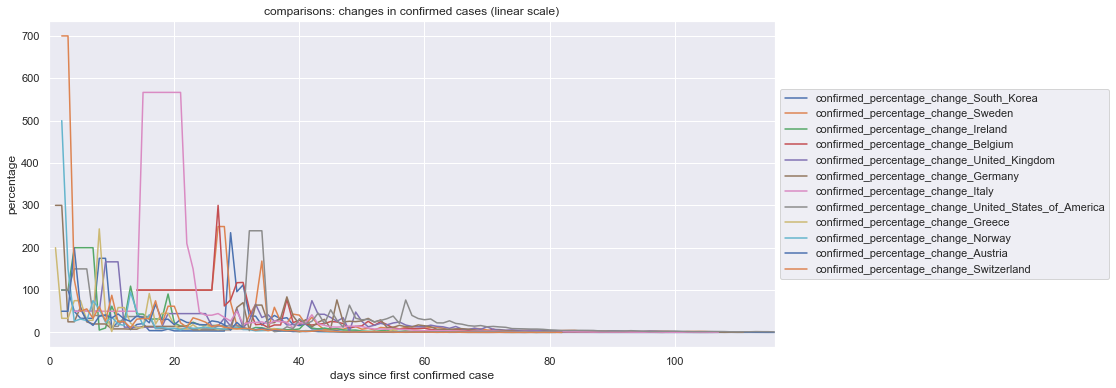

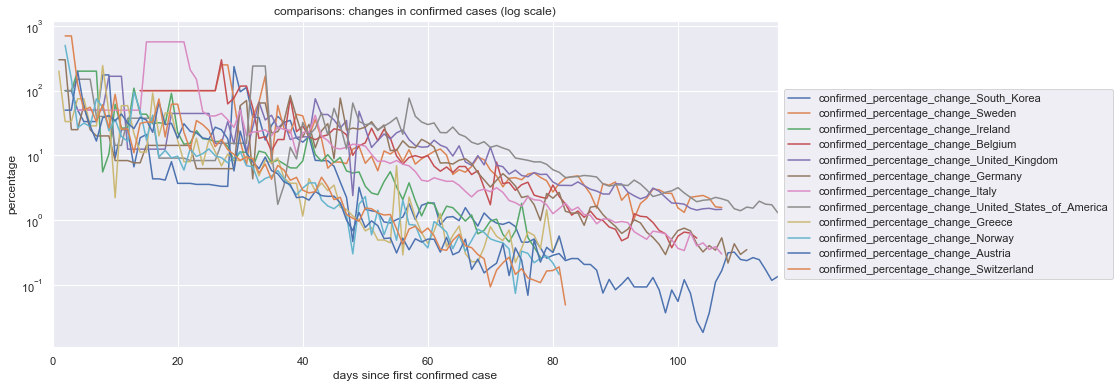

In [30]:
__df = _df[[
    'confirmed_percentage_change_South_Korea',
    'confirmed_percentage_change_Sweden',
    'confirmed_percentage_change_Ireland',
    'confirmed_percentage_change_Belgium',
    'confirmed_percentage_change_United_Kingdom',
    'confirmed_percentage_change_Germany',
    'confirmed_percentage_change_Italy',
    'confirmed_percentage_change_United_States_of_America',
    'confirmed_percentage_change_Greece',
    'confirmed_percentage_change_Norway',
    'confirmed_percentage_change_Austria',
    'confirmed_percentage_change_Switzerland']]
display(__df.tail())

title = 'comparisons: changes in confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_South_Korea  deaths_percentage_change_Sweden  \
112                              0.386100                              NaN   
113                              0.386100                              NaN   
114                              0.769231                              NaN   
115                              0.769231                              NaN   
116                              0.381679                              NaN   

     deaths_percentage_change_Ireland  deaths_percentage_change_Belgium  \
112                               NaN                               NaN   
113                               NaN                               NaN   
114                               NaN                               NaN   
115                               NaN                               NaN   
116                               NaN                               NaN   

     deaths_percentage_change_United_Kingdom  \
112                                      NaN   
113                                      NaN   
114                                      NaN   
115                                      NaN   
116                                      NaN   

     deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
112                               NaN                             NaN   
113                               NaN                             NaN   
114                               NaN                             NaN   
115                               NaN                             NaN   
116                               NaN                             NaN   

     deaths_percentage_change_United_States_of_America  \
112                                           2.140706   
113                                           2.114861   
114                                           1.899928   
115                                           1.398378   
116                                           0.910382   

     deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
112                              NaN                              NaN   
113                              NaN                              NaN   
114                              NaN                              NaN   
115                              NaN                              NaN   
116                              NaN                              NaN   

     deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  
112                               NaN                                   NaN  
113                               NaN                                   NaN  
114                               NaN                                   NaN  
115                               NaN                                   NaN  
116                               NaN                                   NaN

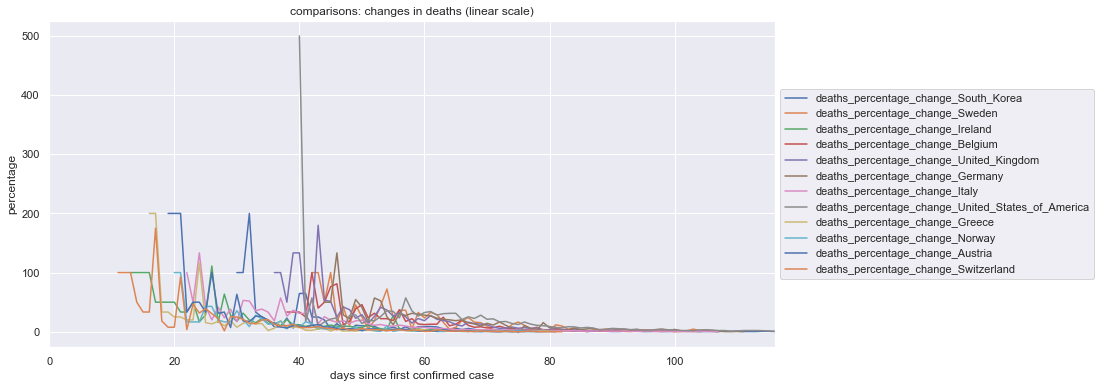

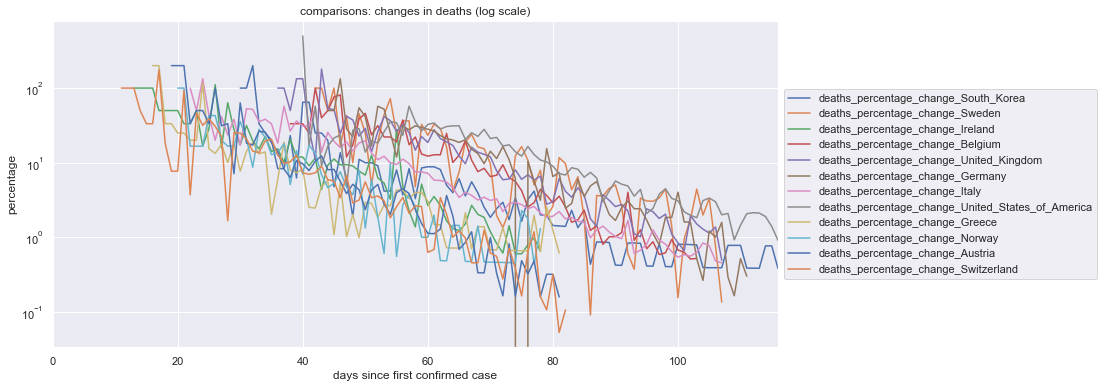

In [31]:
___df = _df[[
    'deaths_percentage_change_South_Korea',
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_United_States_of_America',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_Sweden  deaths_percentage_change_Belgium  \
112                              NaN                               NaN   
113                              NaN                               NaN   
114                              NaN                               NaN   
115                              NaN                               NaN   
116                              NaN                               NaN   

     deaths_percentage_change_Ireland  \
112                               NaN   
113                               NaN   
114                               NaN   
115                               NaN   
116                               NaN   

     deaths_percentage_change_United_Kingdom  \
112                                      NaN   
113                                      NaN   
114                                      NaN   
115                                      NaN   
116                                      NaN   

     deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
112                               NaN                             NaN   
113                               NaN                             NaN   
114                               NaN                             NaN   
115                               NaN                             NaN   
116                               NaN                             NaN   

     deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
112                              NaN                              NaN   
113                              NaN                              NaN   
114                              NaN                              NaN   
115                              NaN                              NaN   
116                              NaN                              NaN   

     deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  
112                               NaN                                   NaN  
113                               NaN                                   NaN  
114                               NaN                                   NaN  
115                               NaN                                   NaN  
116                               NaN                                   NaN

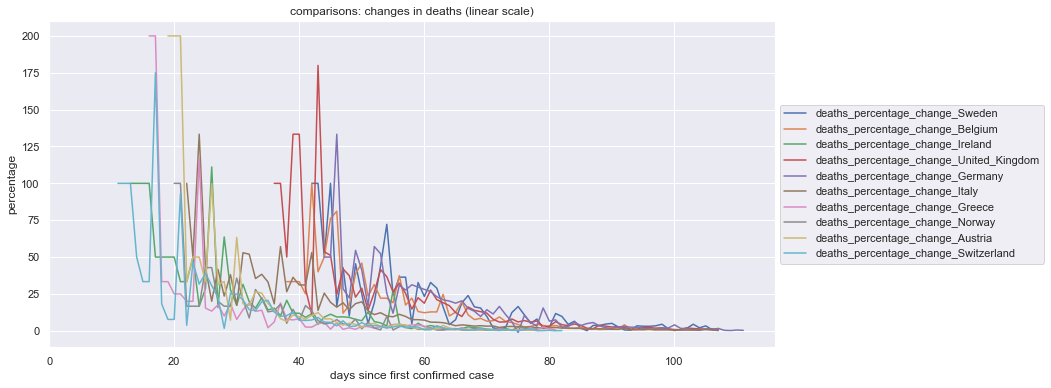

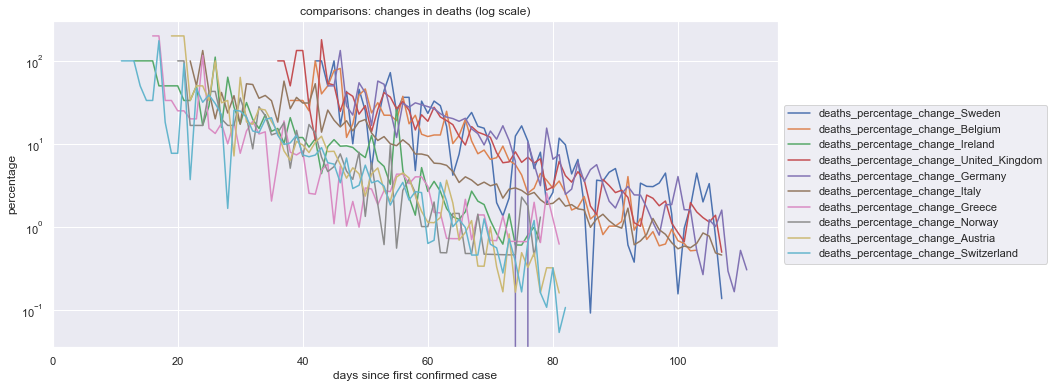

In [32]:
# some European countries
___df = _df[[
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');